In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "AZ"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AZ ['INSTRUÇÕES', 'Clínquer', '4', '92', '70', '111', '156']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('AZ', '4', array(['CPIIE40'], dtype=object)),
 ('AZ', '92', array(['CPIIIRS32'], dtype=object)),
 ('AZ', '70', array(['CPIND'], dtype=object)),
 ('AZ', '111', array(['CPVARI'], dtype=object)),
 ('AZ', '156', array(['CPIIIRS40'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIE40': 1,
         'CPIIIRS32': 1,
         'CPIND': 1,
         'CPVARI': 1,
         'CPIIIRS40': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 2045 non-null   object        
 1   (Data, Produção)                             2045 non-null   datetime64[ns]
 2   (Horário, Produção)                          2045 non-null   object        
 3   (Data, Medida)                               2045 non-null   datetime64[ns]
 4   (Horário, Medida)                            2045 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        2045 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1396 non-null   object        
 7   (Obs., Unnamed: 8_level_2)                   2045 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 127.9+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 112.0 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                2045 non-null   object 
 1   MgO                2045 non-null   object 
 2   Na2O               2045 non-null   object 
 3   Al2O3              2045 non-null   object 
 4   SiO2               2045 non-null   object 
 5   SO3                2045 non-null   object 
 6   K2O                2045 non-null   object 
 7   TiO2               1953 non-null   object 
 8   Fe2O3              2045 non-null   object 
 9   Perda ao fogo      2045 non-null   object 
 10  Resíduo insolúvel  2045 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 191.8+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               2045 non-null   object 
 6   C3A                2045 non-null   object 
 7   C3A cubic          1752 non-null   object 
 8   C3A orto           1752 non-null   object 
 9   CaO livre          2045 non-null   object 
 10  Portlandita        2045 non-null   object 
 11  Periclasio         2045 non-null   object 
 12  Arcanita           2045 non-null   object 
 13  Aphthalita         2045 non-null   object 
 14  Langbeinita        2045 non-null   object 
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          2045 

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            2045 non-null   int64  
 1   (Unnamed: 137_level_1, #200)              2045 non-null   float64
 2   (Unnamed: 138_level_1, #325)              2045 non-null   float64
 3   (Unnamed: 139_level_1, #400)              1953 non-null   float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 96.0 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           2045 non-null   int64  
 1   (Tempo de pega, Fim)              2045 non-null   int64  
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   2045 non-null   float64
 4   (Resistência à compressão, 7 d)   2045 non-null   float64
 5   (Resistência à compressão, 28 d)  2045 non-null   float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 112.0 KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 57 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  2045 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  2045 non-null   object 
 2   (Data, Produção)                                              2045 non-null   object 
 3   (Horário, Produção)                                           2045 non-null   object 
 4   (Data, Medida)                                                2045 non-null   object 
 5   (Horário, Medida)                                             2045 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         2045 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1396 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(2044, 48)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant       City       Date  Total C3S  Total C2S  Alpha C2S  Beta C2S  \
0    AZ  Cantagalo 2021-01-07        NaN        NaN        NaN       NaN   
1    AZ  Cantagalo 2021-01-09        NaN        NaN        NaN       NaN   
2    AZ  Cantagalo 2021-01-12        NaN        NaN        NaN       NaN   
3    AZ  Cantagalo 2021-01-14        NaN        NaN        NaN       NaN   
4    AZ  Cantagalo 2021-01-16        NaN        NaN        NaN       NaN   

   Gamma C2S  C4AF   C3A  ...  #325  #400  Specific Gravity  \
0        NaN  6.22  3.23  ...   1.4   2.9               NaN   
1        NaN  5.99  3.11  ...   1.1   2.9               NaN   
2        NaN  6.31  3.35  ...   1.0   2.7               NaN   
3        NaN  6.75  3.46  ...   1.2   2.5               NaN   
4        NaN  5.90  3.40  ...   0.8   1.9               NaN   

   Initial setting time  Final setting time  CS1        CS3        CS7  \
0                 170.0               220.0  NaN  22.500000  34.500000   
1                 210.0               280.0  NaN  22.100000  34.299999   
2                 190.0               250.0  NaN  22.900000  34.500000   
3                 165.0               220.0  NaN  24.200001  35.299999   
4                 185.0               240.0  NaN  22.500000  34.200001   

        CS28        Cement_Type  
0  46.200001  CP II-E40Expedido  
1  48.000000  CP II-E40Expedido  
2  48.000000  CP II-E40Expedido  
3  46.200001  CP II-E40Expedido  
4  48.000000  CP II-E40Expedido  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant       City       Date  Total C3S  Total C2S  Alpha C2S  Beta C2S  \
2039    AZ  Cantagalo 2021-07-31        NaN        NaN        NaN       NaN   
2040    AZ  Cantagalo 2021-08-03        NaN        NaN        NaN       NaN   
2041    AZ  Cantagalo 2021-08-05        NaN        NaN        NaN       NaN   
2042    AZ  Cantagalo 2021-08-07        NaN        NaN        NaN       NaN   
2043    AZ  Cantagalo 2021-08-10        NaN        NaN        NaN       NaN   

      Gamma C2S  C4AF   C3A  ...  #325  #400  Specific Gravity  \
2039        NaN  3.40  0.83  ...   0.7   NaN               NaN   
2040        NaN  3.55  0.91  ...   0.3   NaN               NaN   
2041        NaN  3.47  0.89  ...   1.4   NaN               NaN   
2042        NaN  3.48  0.93  ...   1.1   NaN               NaN   
2043        NaN  3.40  0.98  ...   0.6   NaN               NaN   

      Initial setting time  Final setting time  CS1        CS3        CS7  \
2039                 250.0               330.0  NaN  20.700001  35.700001   
2040                 250.0               335.0  NaN  19.299999  34.200001   
2041                 220.0               280.0  NaN  20.100000  35.799999   
2042                 240.0               310.0  NaN  20.000000  33.299999   
2043                 250.0               310.0  NaN  20.500000  34.700001   

           CS28          Cement_Type  
2039  50.599998  CP III-RS40Expedido  
2040  49.500000  CP III-RS40Expedido  
2041  43.500000  CP III-RS40Expedido  
2042  46.700001  CP III-RS40Expedido  
2043  47.700001  CP III-RS40Expedido  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 2044 non-null   object        
 1   City                  2044 non-null   object        
 2   Date                  2044 non-null   datetime64[ns]
 3   Total C3S             0 non-null      float64       
 4   Total C2S             0 non-null      float64       
 5   Alpha C2S             0 non-null      float64       
 6   Beta C2S              0 non-null      float64       
 7   Gamma C2S             0 non-null      float64       
 8   C4AF                  2022 non-null   float64       
 9   C3A                   2016 non-null   float64       
 10  Cubic C3A             1735 non-null   float64       
 11  Orthorhombic C3A      1735 non-null   float64       
 12  Free CaO              2022 non-null   float64       
 13  Portlandite       

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           44
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                    2044  2022-04-10 18:28:53.072407040   
Total C3S                0.0                            NaN   
Total C2S                0.0                            NaN   
Alpha C2S                0.0                            NaN   
Beta C2S                 0.0                            NaN   
Gamma C2S                0.0                            NaN   
C4AF                  2022.0                        7.34178   
C3A                   2016.0                       2.434454   
Cubic C3A             1735.0                       2.198859   
Orthorhombic C3A      1735.0                       0.498939   
Free CaO              2022.0                       0.306053   
Portlandite           2022.0                       1.092186   
Periclase             2022.0                        0.43958   
Arcanite              2022.0                       0.074085   
Aphthitalite          2022.0                       0.180331   
Langbeinite           1735.0                       0.030709   
Calcium sulfate          0.0                            NaN   
Bassanite             2016.0                       1.283805   
Anhydrite                0.0                            NaN   
Calcite               2016.0                       5.941954   
Dolimita              2017.0                        0.00594   
Quartz                2016.0                       1.041012   
Muscovite             2016.0                       0.339127   
CaO                   2039.0                      57.993963   
MgO                   2043.0                       2.573592   
Na2O                  2043.0                       0.268891   
Al2O3                 2039.0                       6.301833   
SiO2                  2043.0                      21.975061   
SO3                   2043.0                       3.547559   
K2O                   2043.0                       0.509709   
TiO2                  1951.0                       0.274291   
Fe2O3                 2043.0                       2.678705   
Loss on Ignition      1984.0                       4.154471   
Insoluble Residue     1969.0                       1.397791   
Blaine                2044.0                    5257.568493   
#200                  2044.0                       0.081448   
#325                  2044.0                       0.518562   
#400                  1952.0                       1.607833   
Specific Gravity         0.0                            NaN   
Initial setting time  2044.0                     176.433464   
Final setting time    2044.0                     241.586595   
CS1                      0.0                            NaN   
CS3                   2044.0                      30.429354   
CS7                   2044.0                      38.577397   
CS28                  2044.0                       48.82454   

                                      min                  25%  \
Date                  2021-01-04 00:00:00  2021-08-19 00:00:00   
Total C3S                             NaN                  NaN   
Total C2S                             NaN                  NaN   
Alpha C2S                             NaN                  NaN   
Beta C2S                              NaN                  NaN   
Gamma C2S                             NaN                  NaN   
C4AF                                 1.89               5.9525   
C3A                                  0.34               1.6775   
Cubic C3A                            0.02                  1.6   
Orthorhombic C3A                      0.0                 0.01   
Free CaO                              0.0                 0.14   
Portlandite                           0.0                 0.66   
Periclase                             0.0                  0.3   
Arcanite                              0.0                  0.0   
Aphthitalite                          0.0                 0.07   
Langbeinite                           0.0                  0.0   
Ca

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique             top  freq                           mean  \
Plant        2044      1              AZ  2044                            NaN   
City         2044      1       Cantagalo  2044                            NaN   
Date         2044    NaN             NaN   NaN  2022-04-10 18:28:53.072407040   
Cement_Type  2044      5  CP INDExpedido   649                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-01-04 00:00:00  2021-08-19 00:00:00  2022-04-11 12:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
City                         NaN                  NaN  
Date         2022-11-29 06:00:00  2023-07-17 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['AZ'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-E40Expedido', 'CP III-RS32Expedido', 'CP INDExpedido',
       'CP VARIExpedido', 'CP III-RS40Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Cantagalo'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
AZ    2044
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP INDExpedido         649
CP VARIExpedido        639
CP II-E40Expedido      371
CP III-RS32Expedido    293
CP III-RS40Expedido     92
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Cantagalo    2044
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_3414584/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


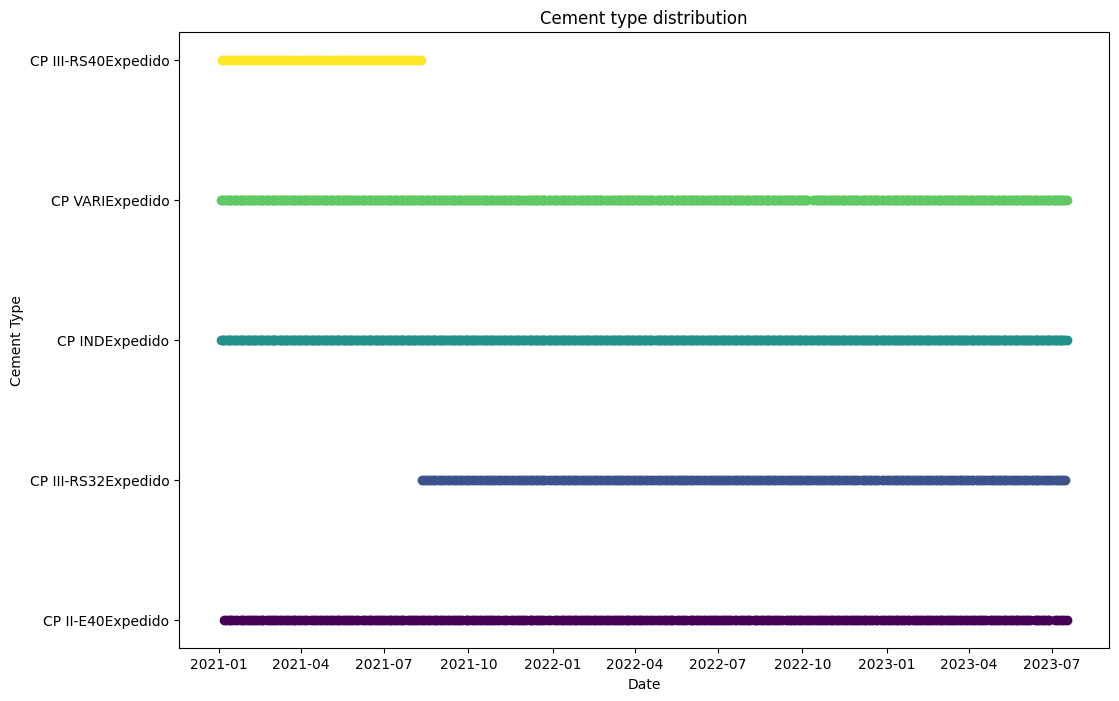

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-E40Expedido
CP III-RS32Expedido
CP INDExpedido
CP VARIExpedido
CP III-RS40Expedido


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

count       mean       std   min        25%   50%        75%  \
Cement_Type                                                                    
CP INDExpedido  649.0  50.536672  2.483802  43.0  48.900002  50.5  52.299999   

                 max  
Cement_Type           
CP INDExpedido  57.5

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


count       mean       std   min        25%   50%        75%  \
Cement_Type                                                                    
CP INDExpedido  649.0  50.536672  2.483802  43.0  48.900002  50.5  52.299999   

                 max  
Cement_Type           
CP INDExpedido  57.5

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP I            649
CP II-E-40      371
CP III-32 RS    293
CP III-40 RS     92
CP V-ARI        639
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_3414584/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


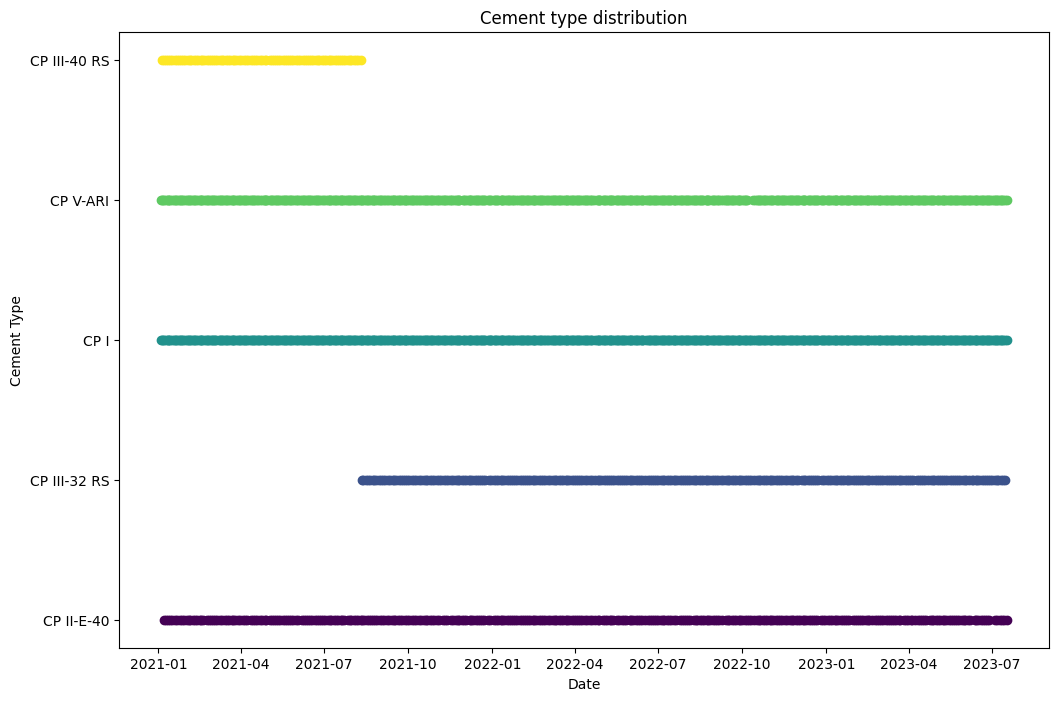

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

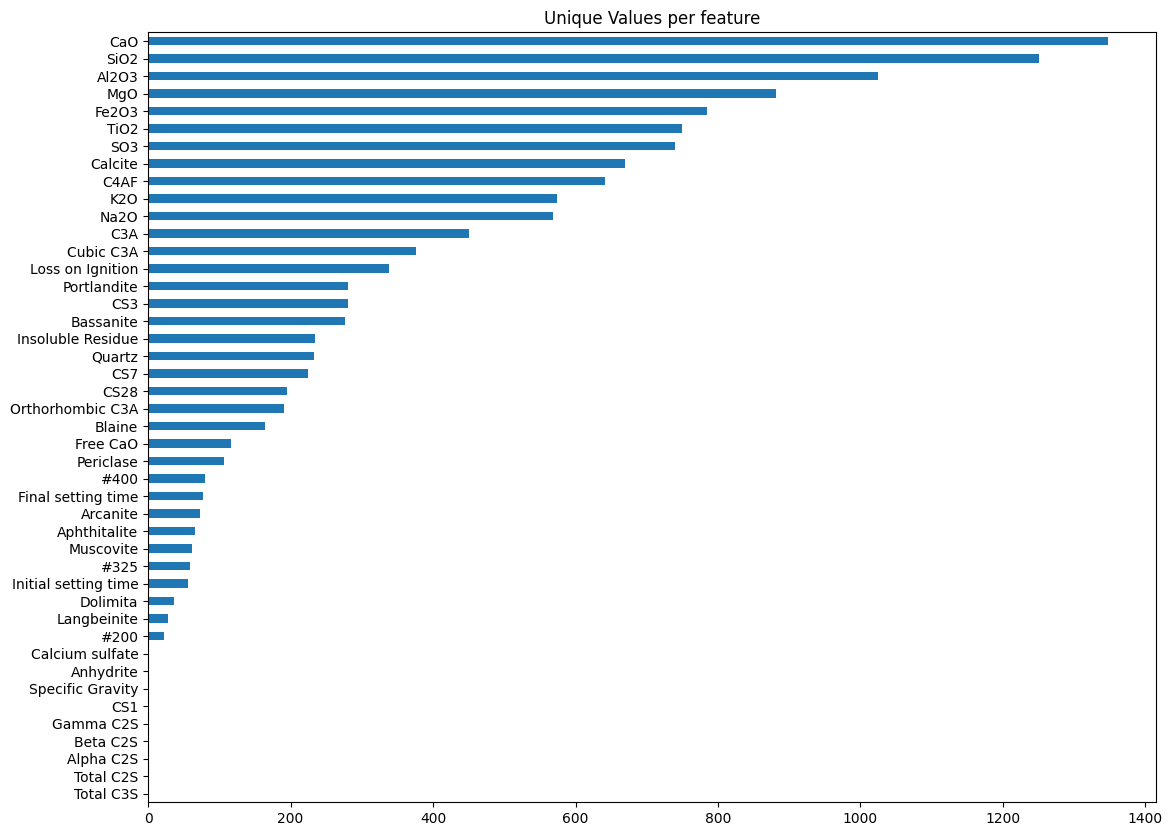

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

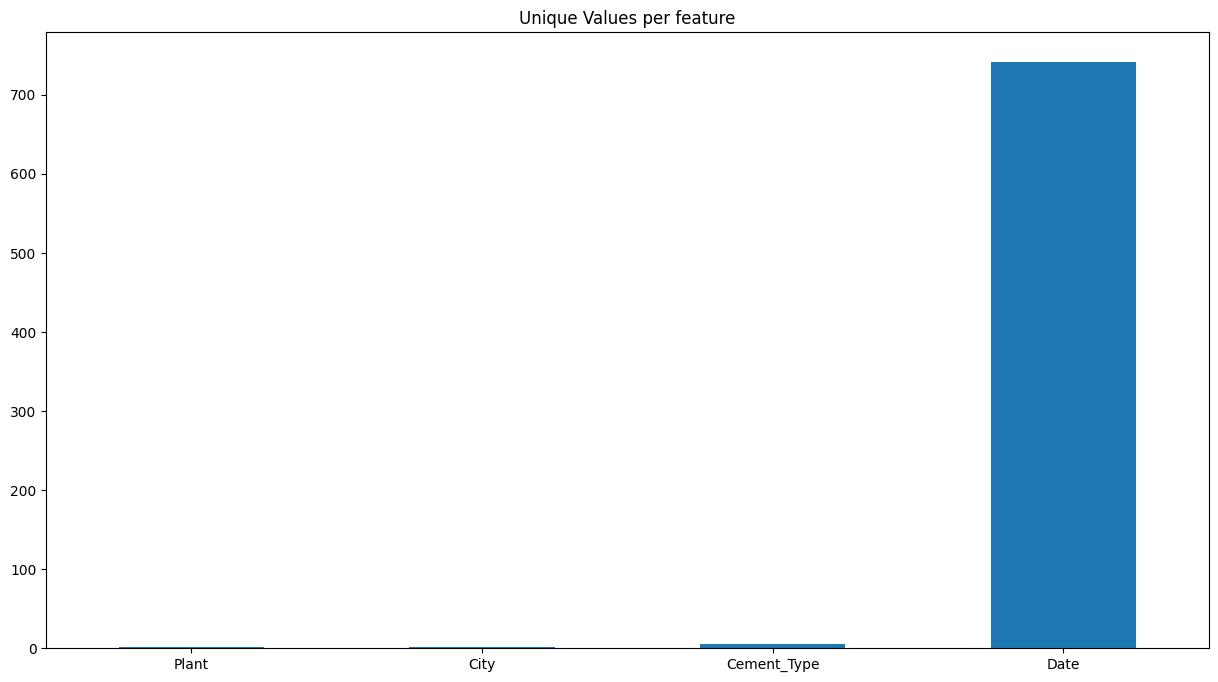

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

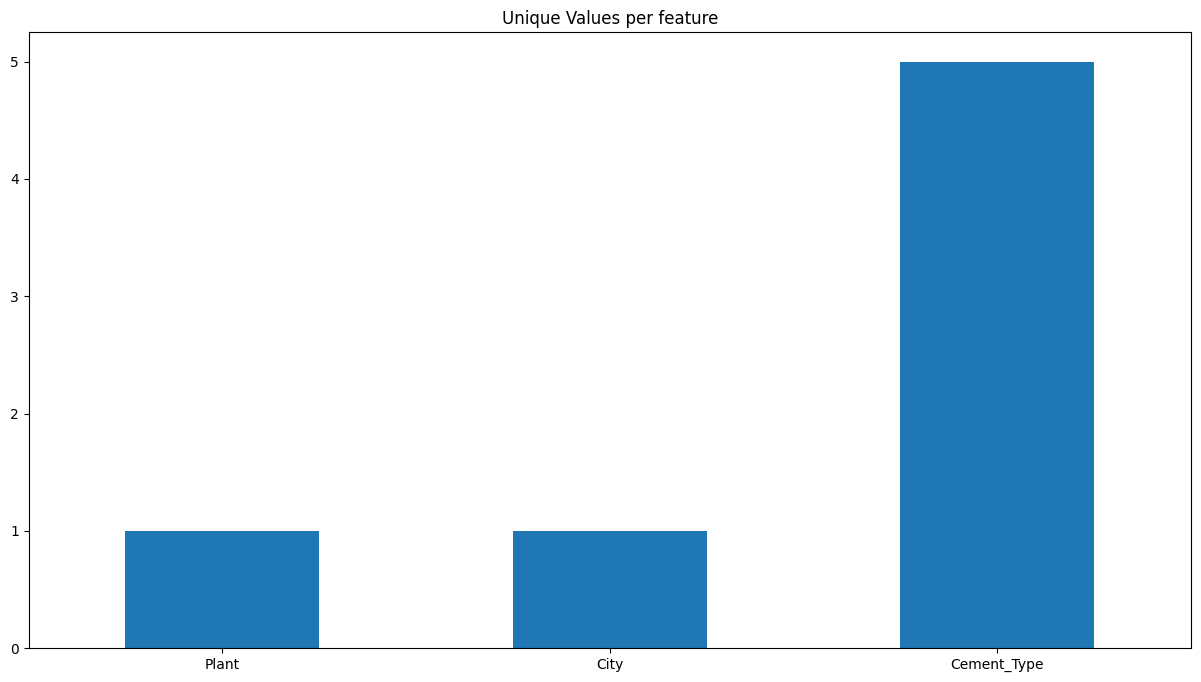

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 36 variables with missing values from a total of 48


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                   False
City                    False
Date                    False
Total C3S                True
Total C2S                True
Alpha C2S                True
Beta C2S                 True
Gamma C2S                True
C4AF                     True
C3A                      True
Cubic C3A                True
Orthorhombic C3A         True
Free CaO                 True
Portlandite              True
Periclase                True
Arcanite                 True
Aphthitalite             True
Langbeinite              True
Calcium sulfate          True
Bassanite                True
Anhydrite                True
Calcite                  True
Dolimita                 True
Quartz                   True
Muscovite                True
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3     

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 48 artists>

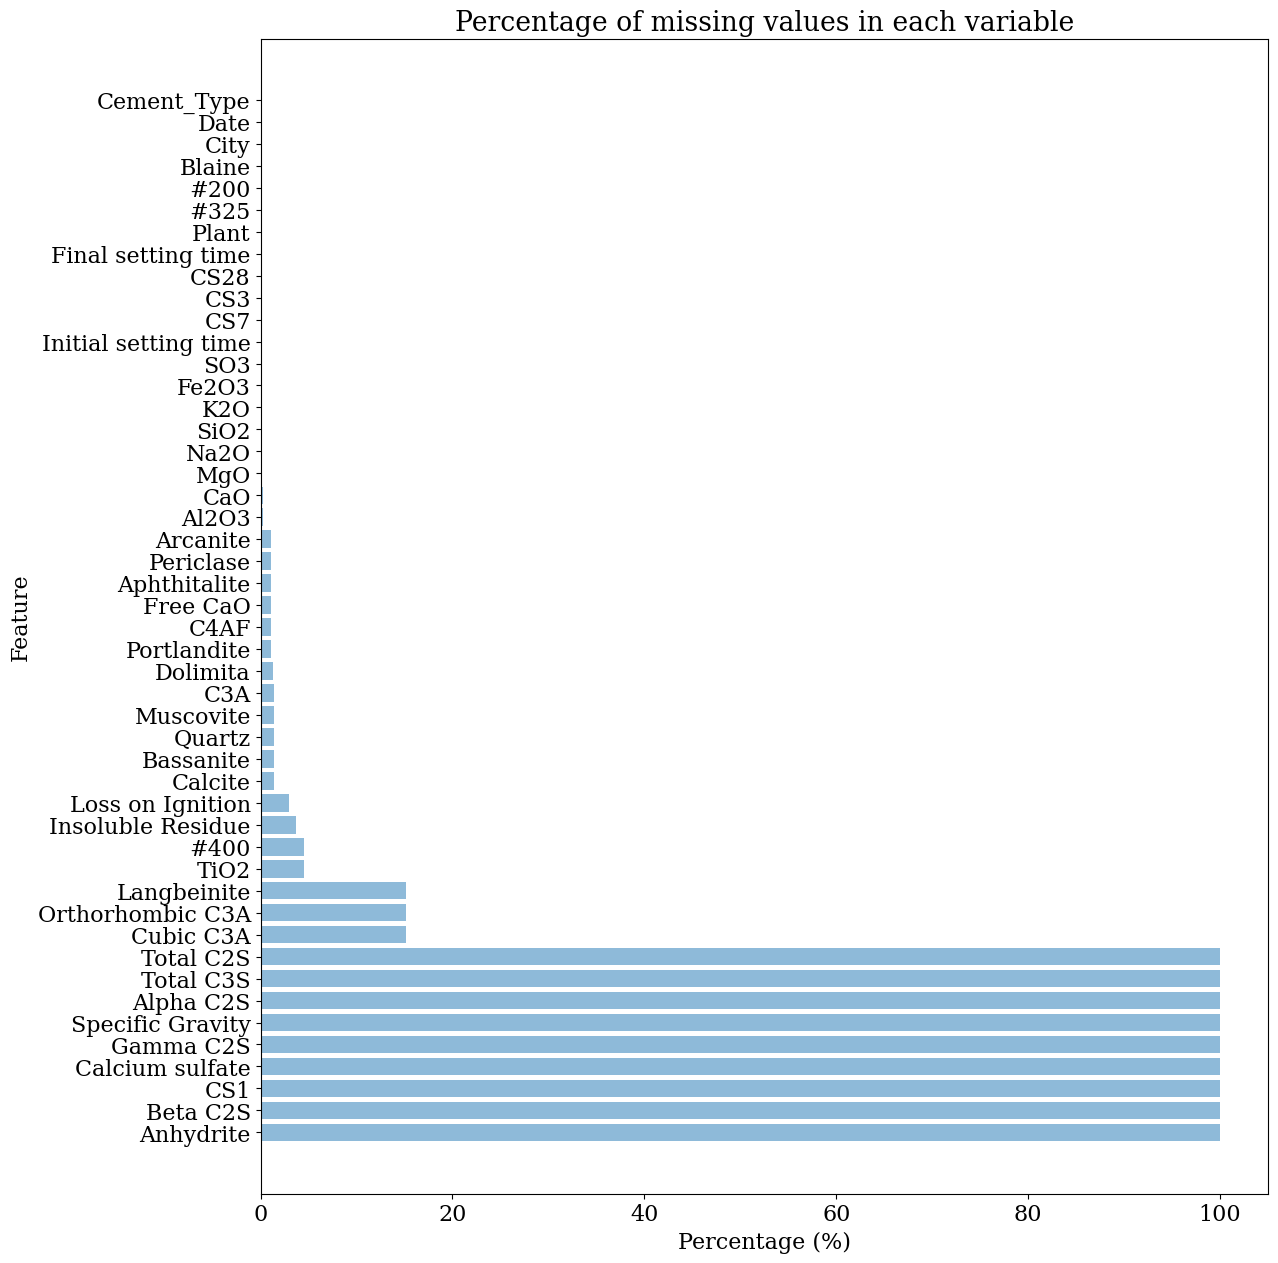

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Total C3S', 'Total C2S', 'Alpha C2S', 'Beta C2S', 'Gamma C2S', 'C4AF',
       'C3A', 'Cubic C3A', 'Orthorhombic C3A', 'Free CaO', 'Portlandite',
       'Periclase', 'Arcanite', 'Aphthitalite', 'Langbeinite',
       'Calcium sulfate', 'Bassanite', 'Anhydrite', 'Calcite', 'Dolimita',
       'Quartz', 'Muscovite', 'CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3',
       'K2O', 'TiO2', 'Fe2O3', 'Loss on Ignition', 'Insoluble Residue',
       'Blaine', '#200', '#325', '#400', 'Specific Gravity',
       'Initial setting time', 'Final setting time', 'CS1', 'CS3', 'CS7',
       'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for AZ
Dolimita                    95.743640
Arcanite                    69.569472
#200                        41.585127
Langbeinite                 34.246575
Free CaO                    15.508806
Aphthitalite                11.007828
TiO2                         1.663405
#325                         0.587084
Bassanite                    0.587084
Muscovite                    0.587084
Quartz                       0.342466
Portlandite                  0.244618
Periclase                    0.146771
Orthorhombic C3A             0.146771
Calcite                      0.097847
Fe2O3                        0.000000
Loss on Ignition             0.000000
Insoluble Residue            0.000000
Blaine                       0.000000
CS7                          0.000000
Specific Gravity             0.000000
CS3                          0.000000
#400                         0.000000
K2O                          0.000000
CS1                          0.000000
Final setting time           0.000000
Initial setting time         0.000000
Total C3S                    0.000000
CaO                          0.000000
SO3                          0.000000
SiO2                         0.000000
Al2O3                        0.000000
Na2O                         0.000000
MgO                          0.000000
Total C2S                    0.000000
Anhydrite                    0.000000
Calcium sulfate              0.000000
Cubic C3A                    0.000000
C3A                          0.000000
C4AF                         0.000000
Gamma C2S                    0.000000
Beta C2S                     0.000000
Alpha C2S                    0.000000
CS28                         0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

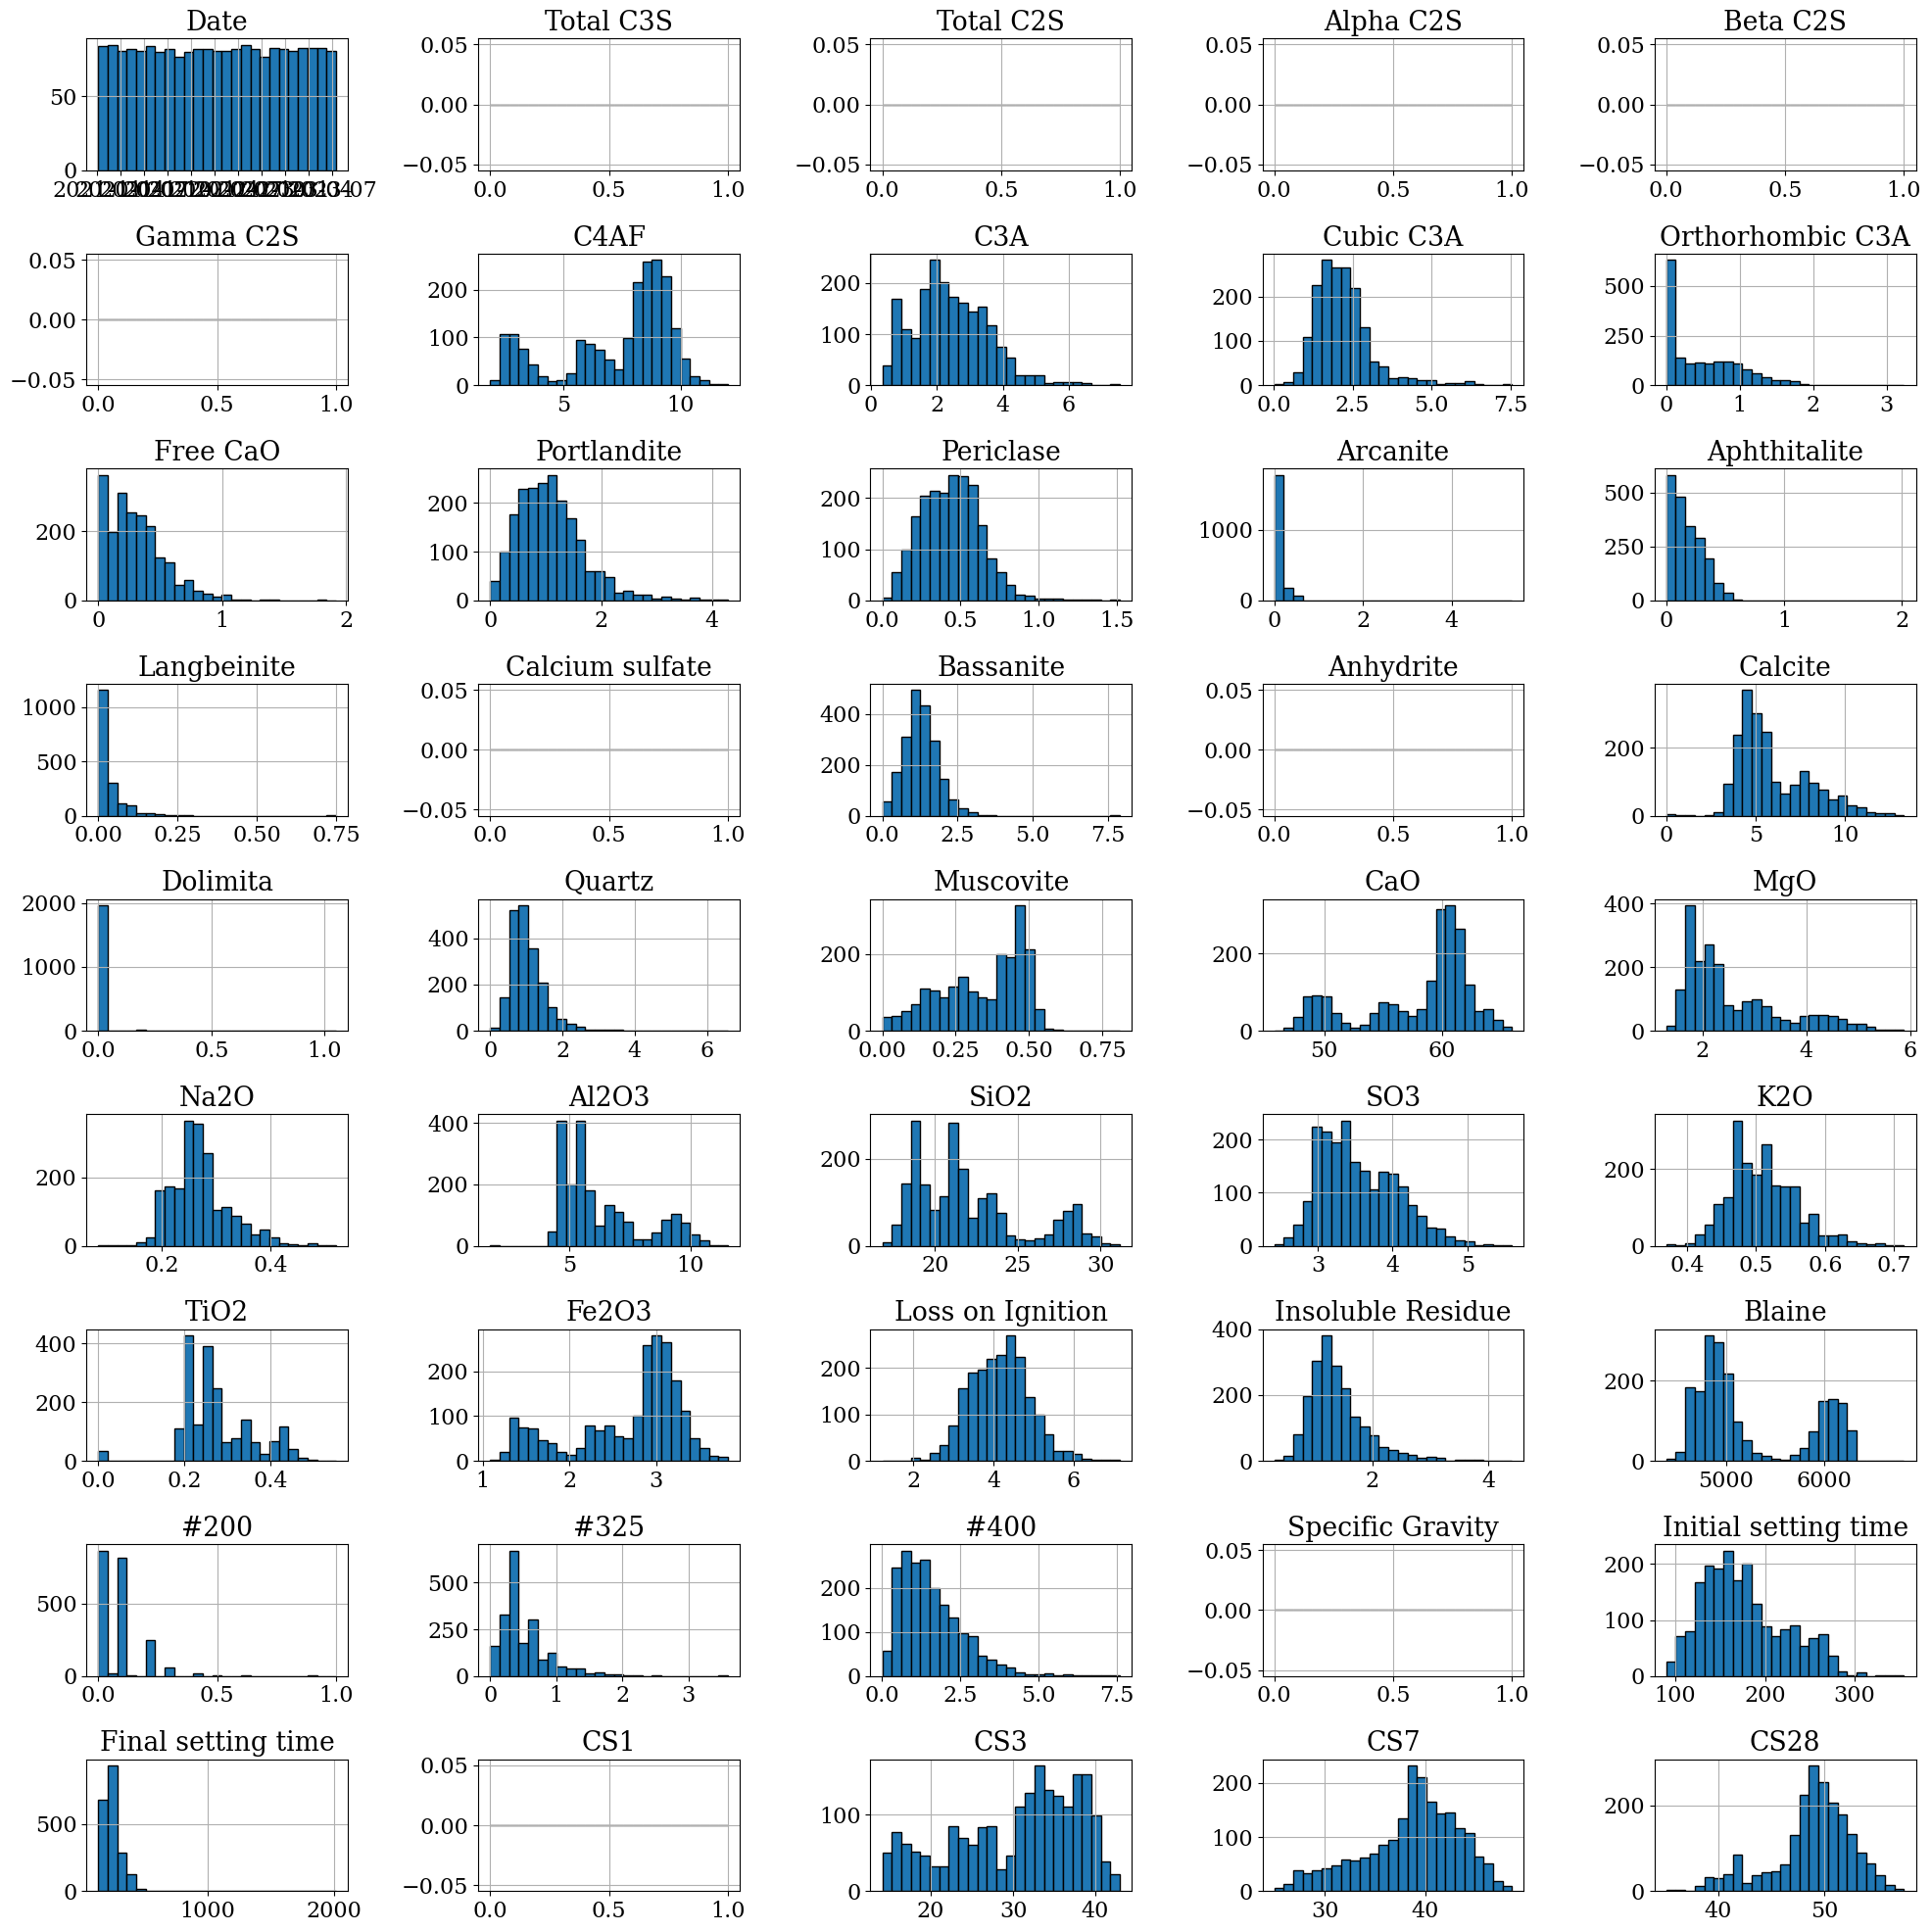

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

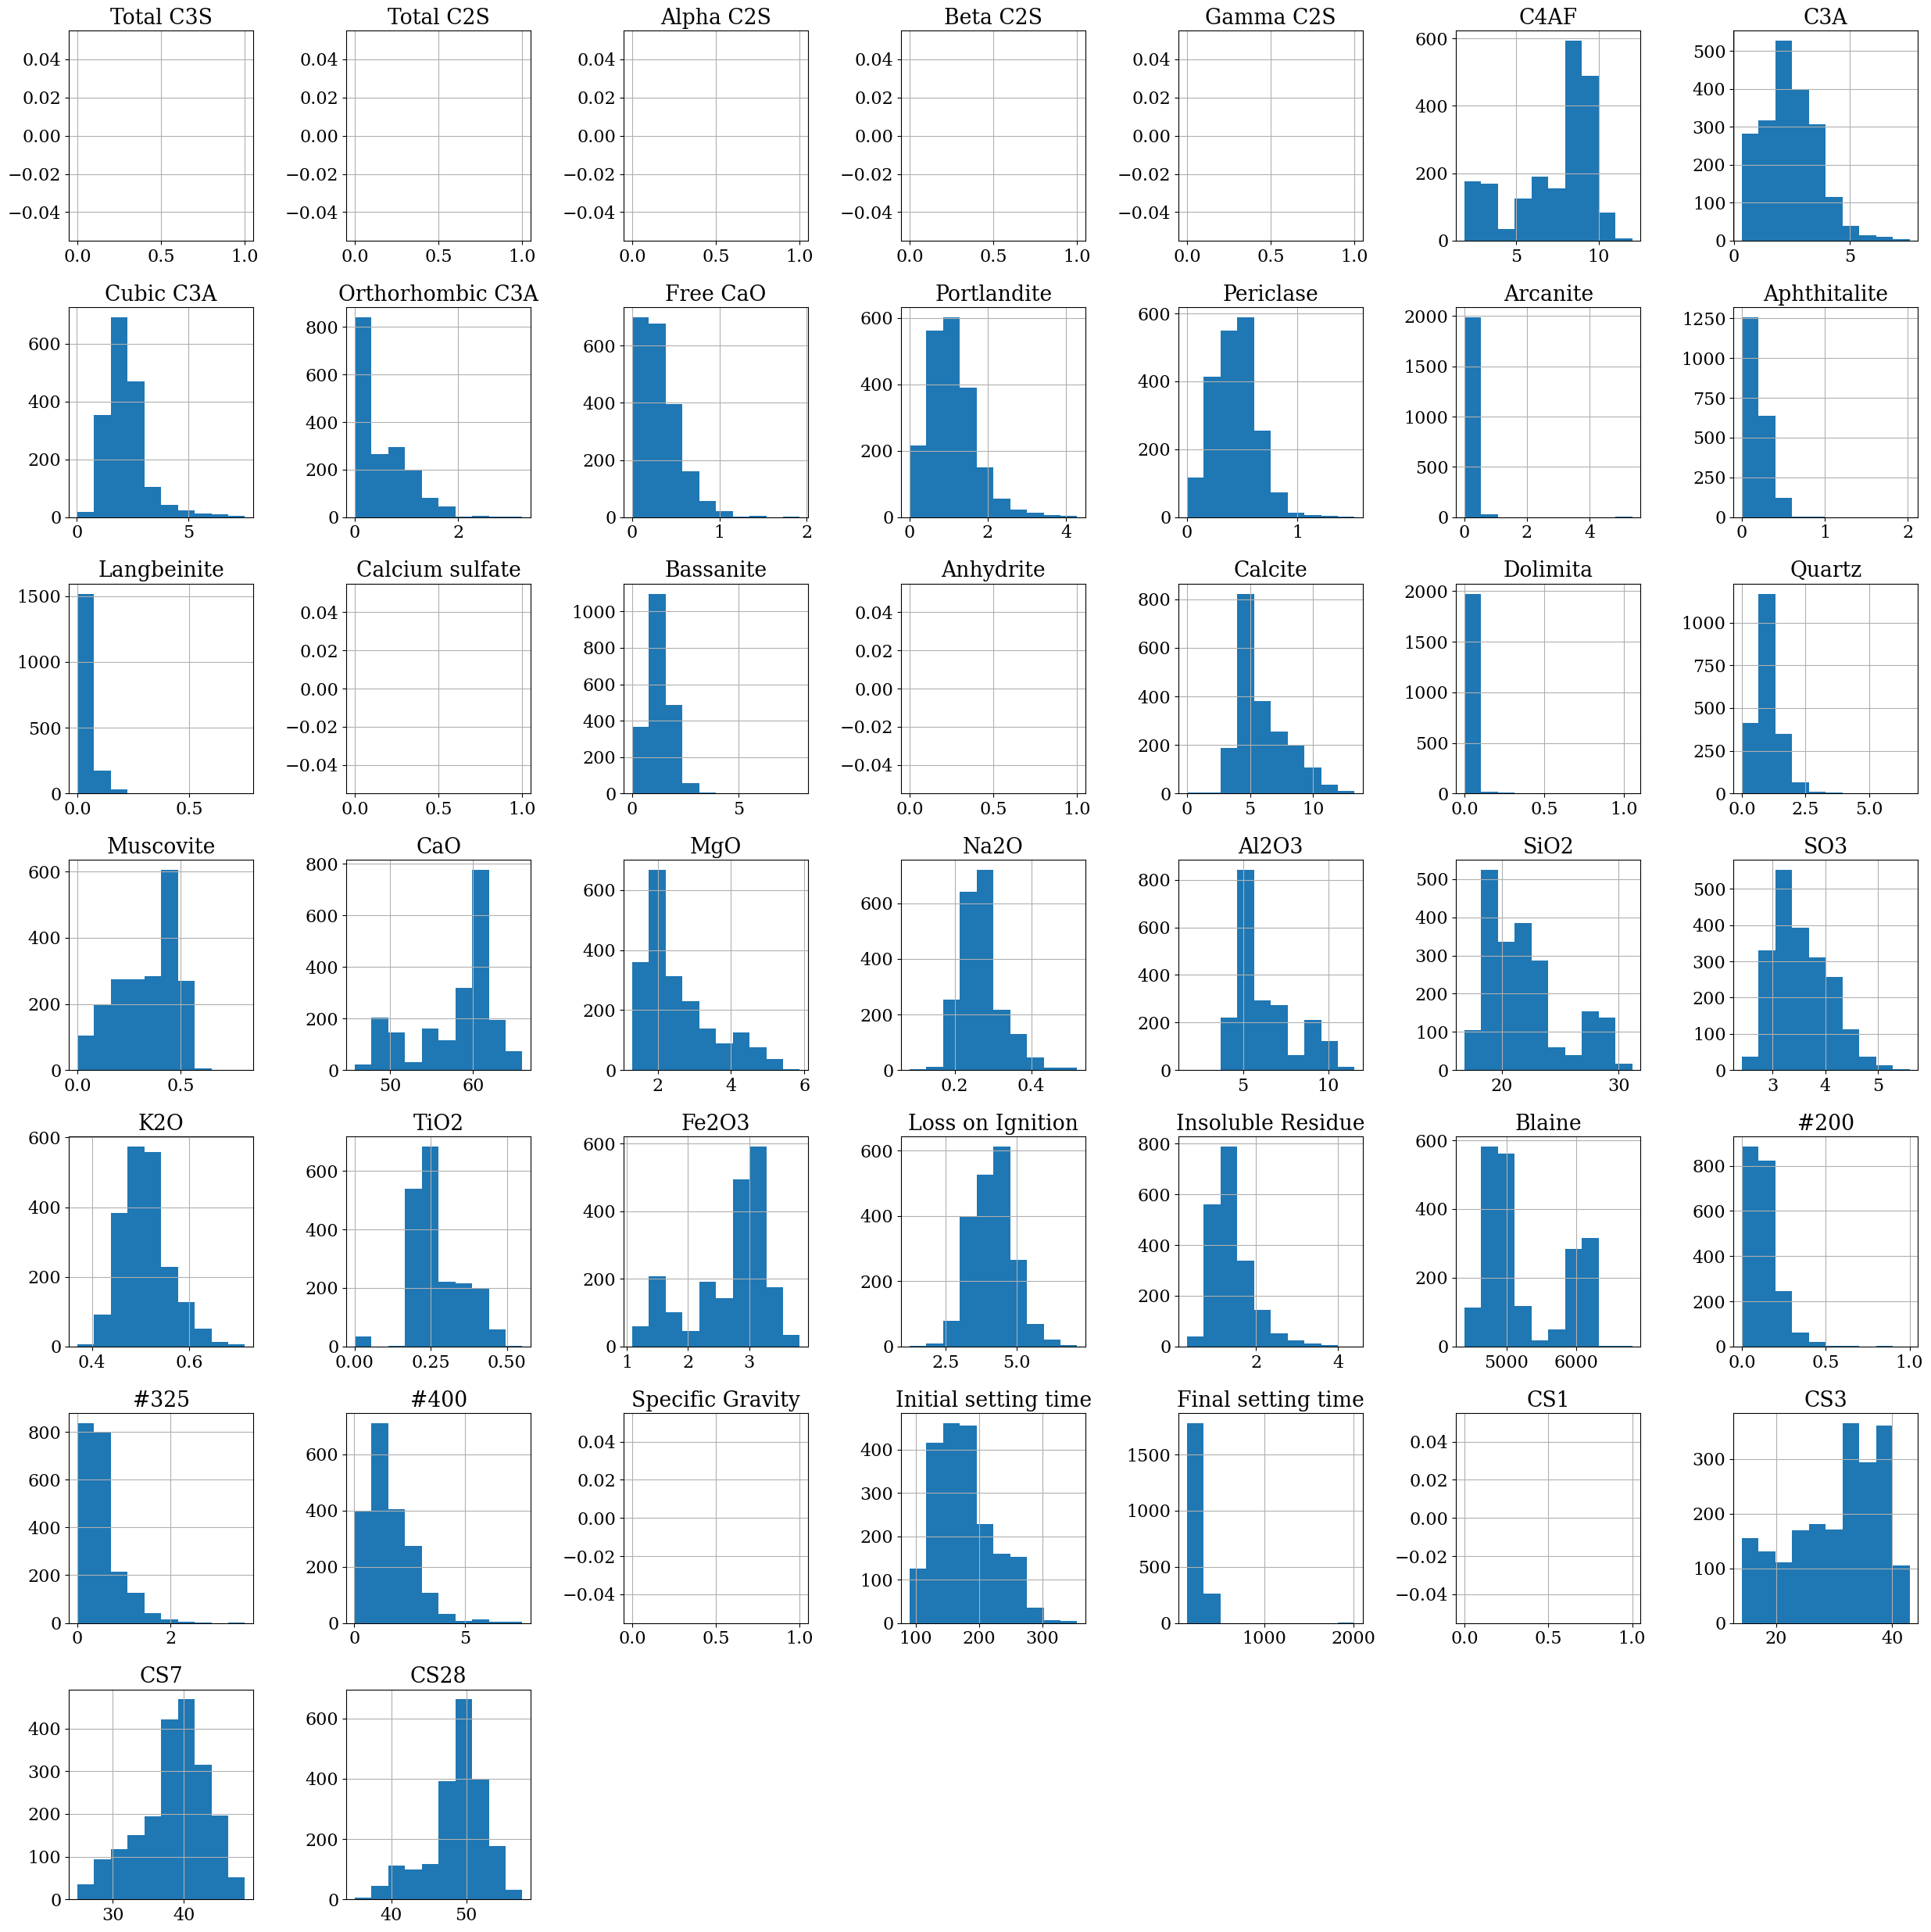

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

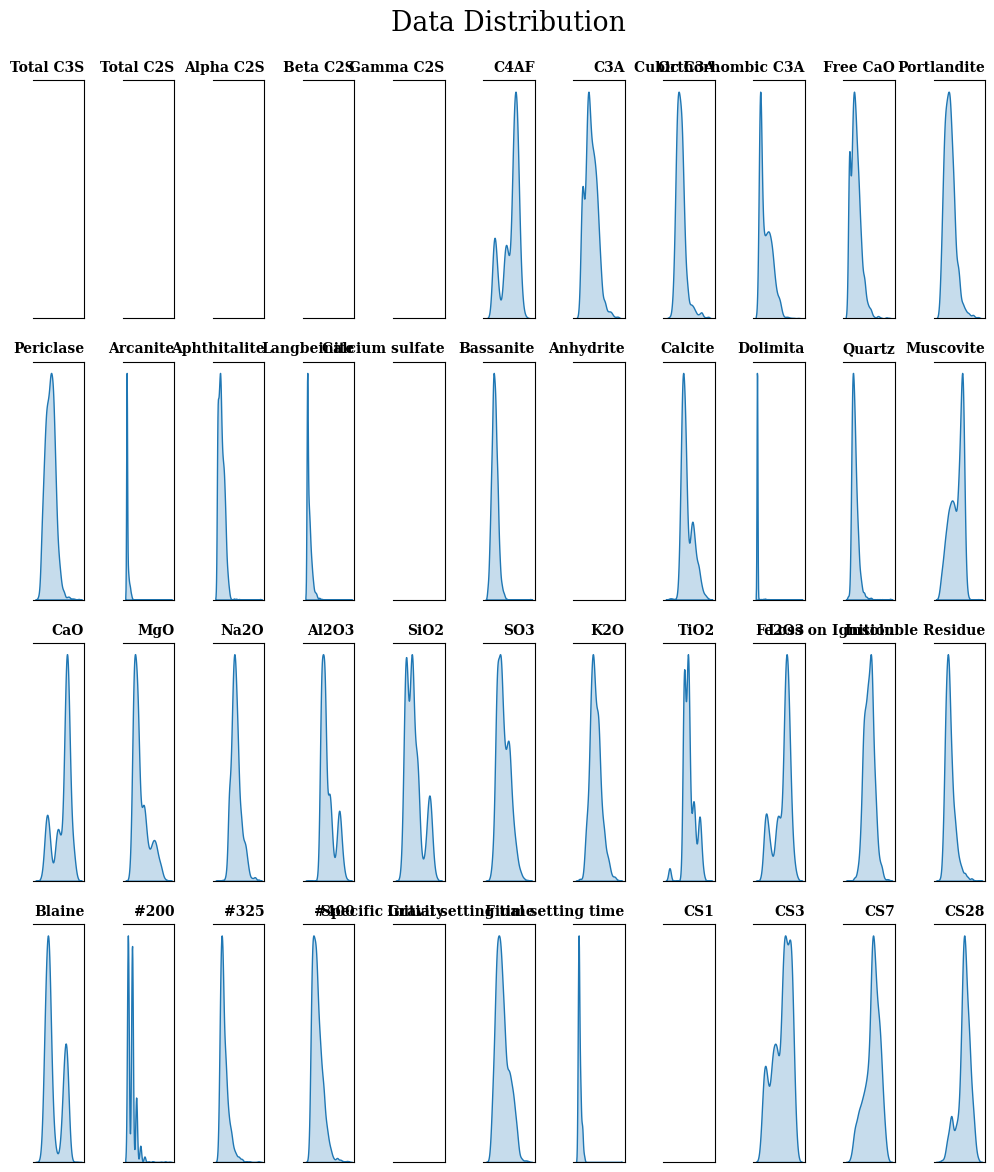

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 11, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").select_dtypes(exclude=object).columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

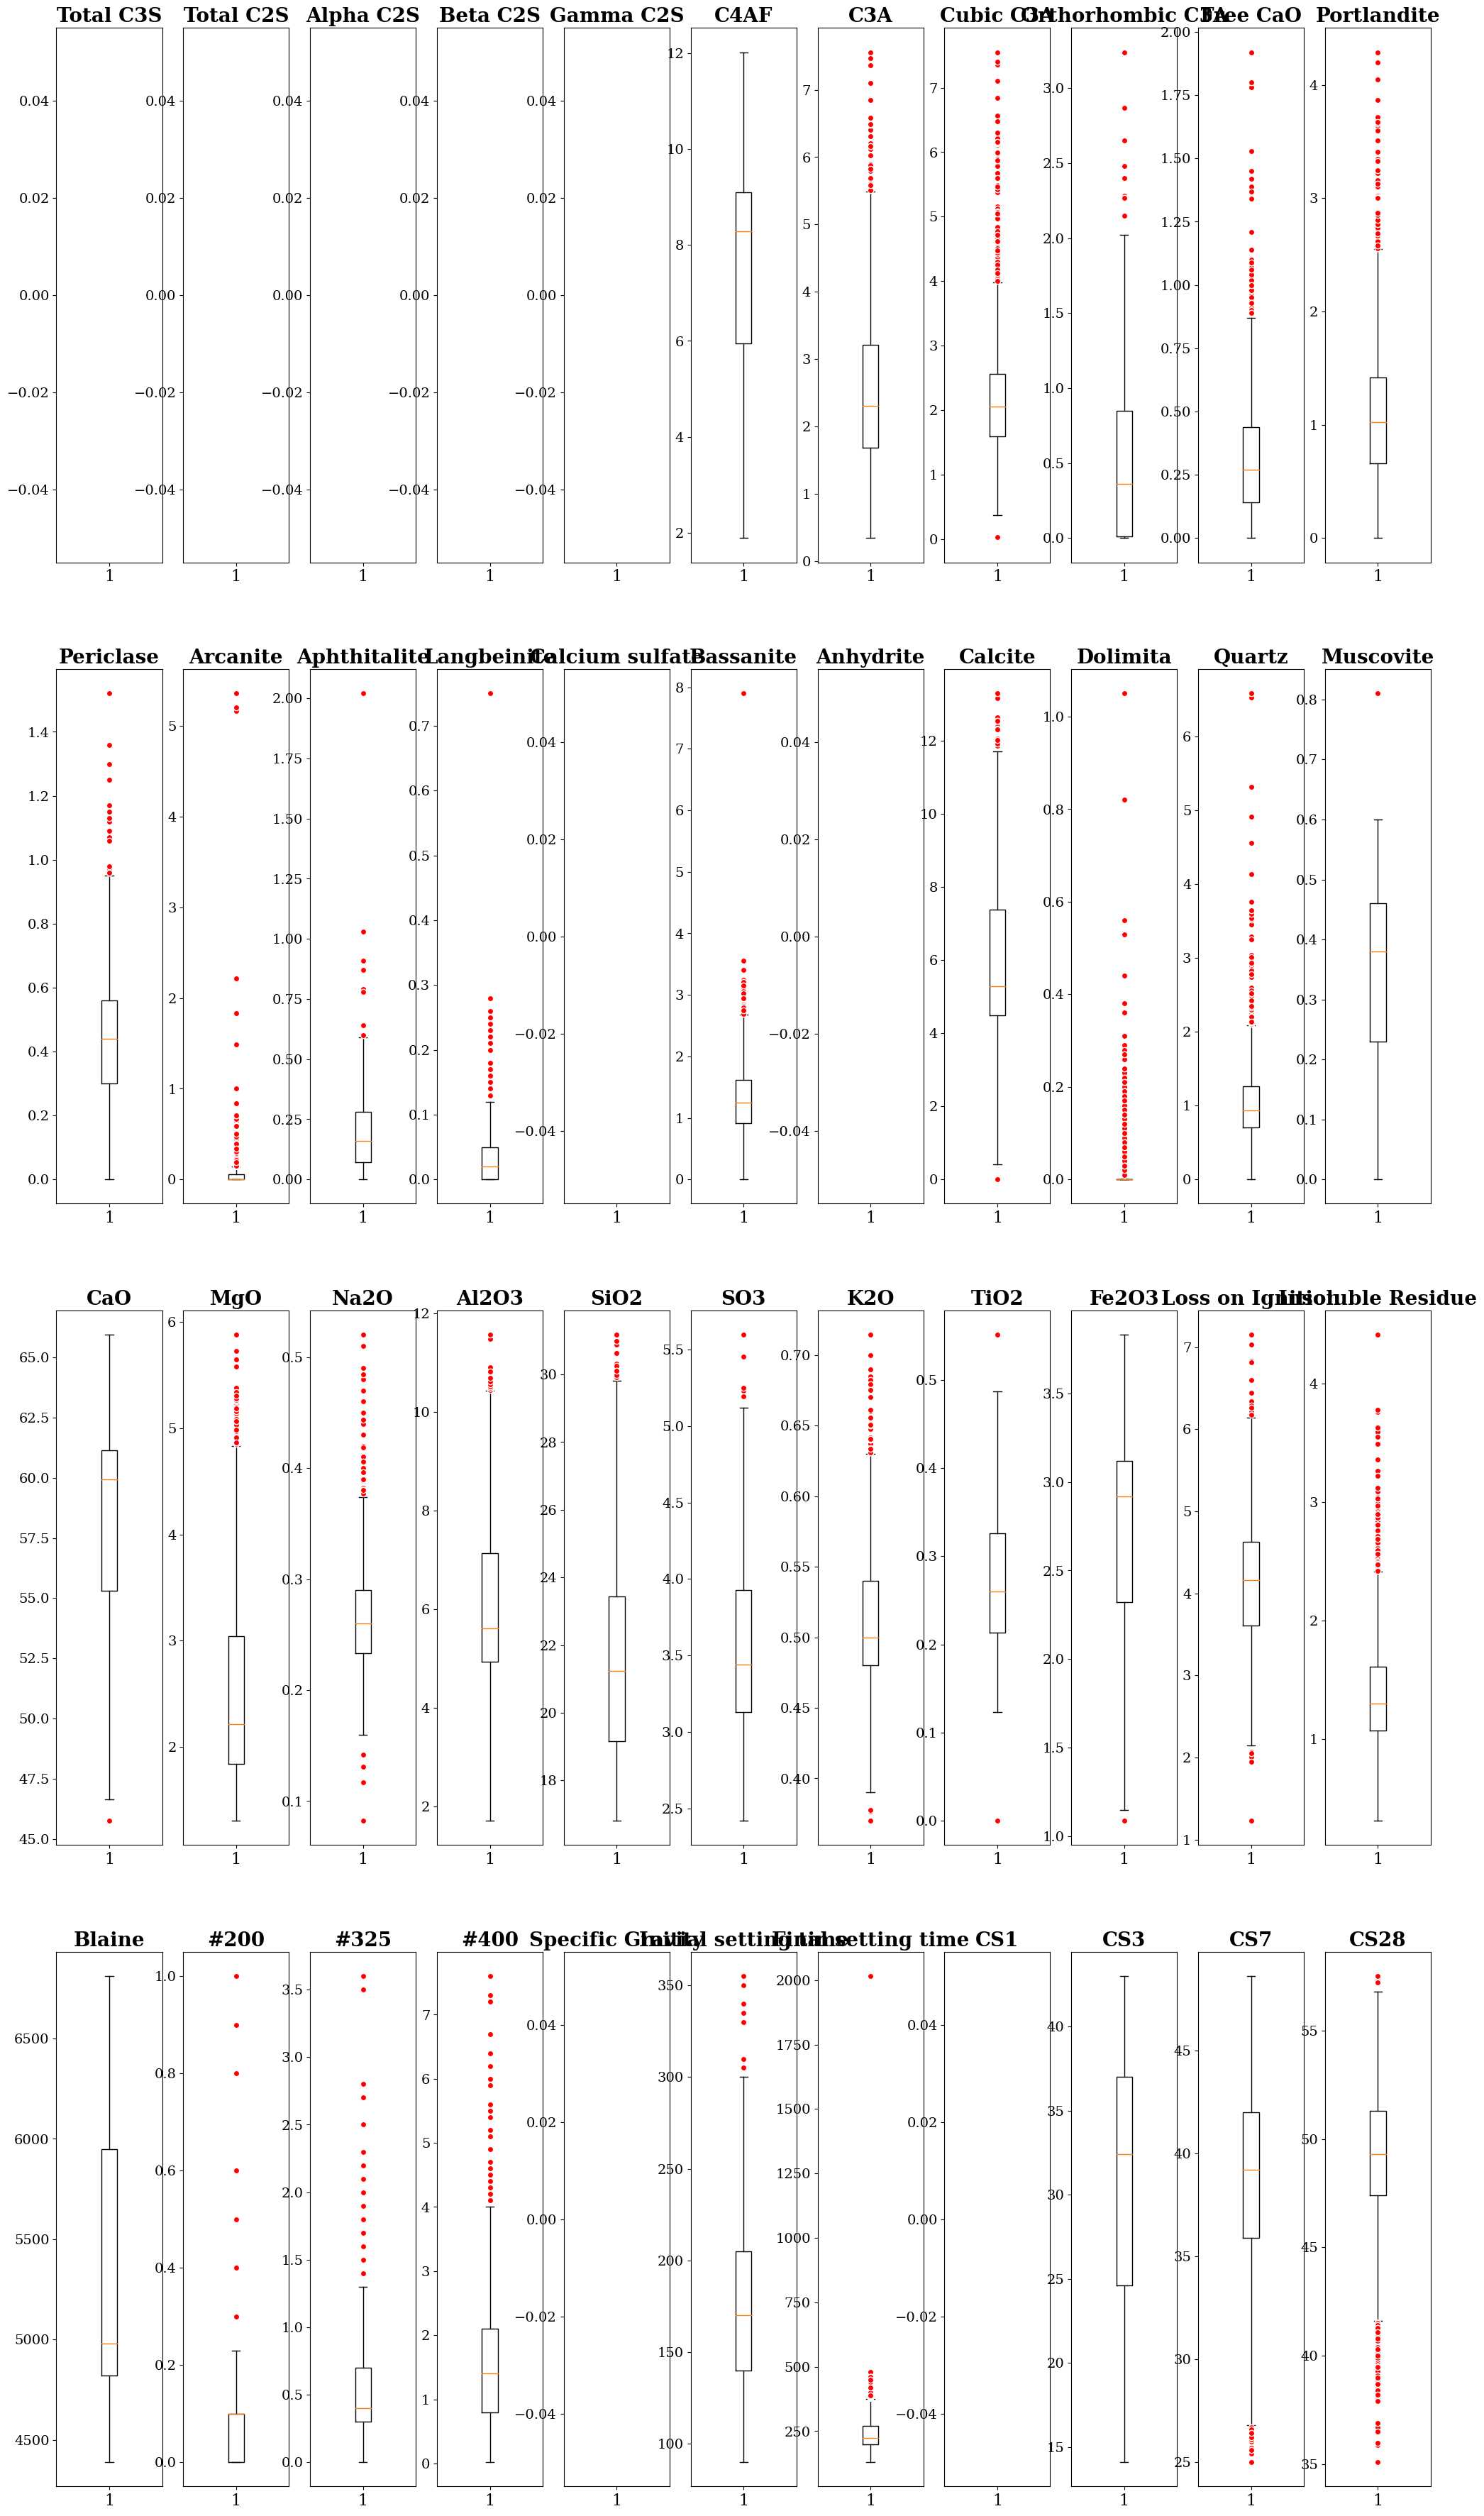

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(4, 11, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

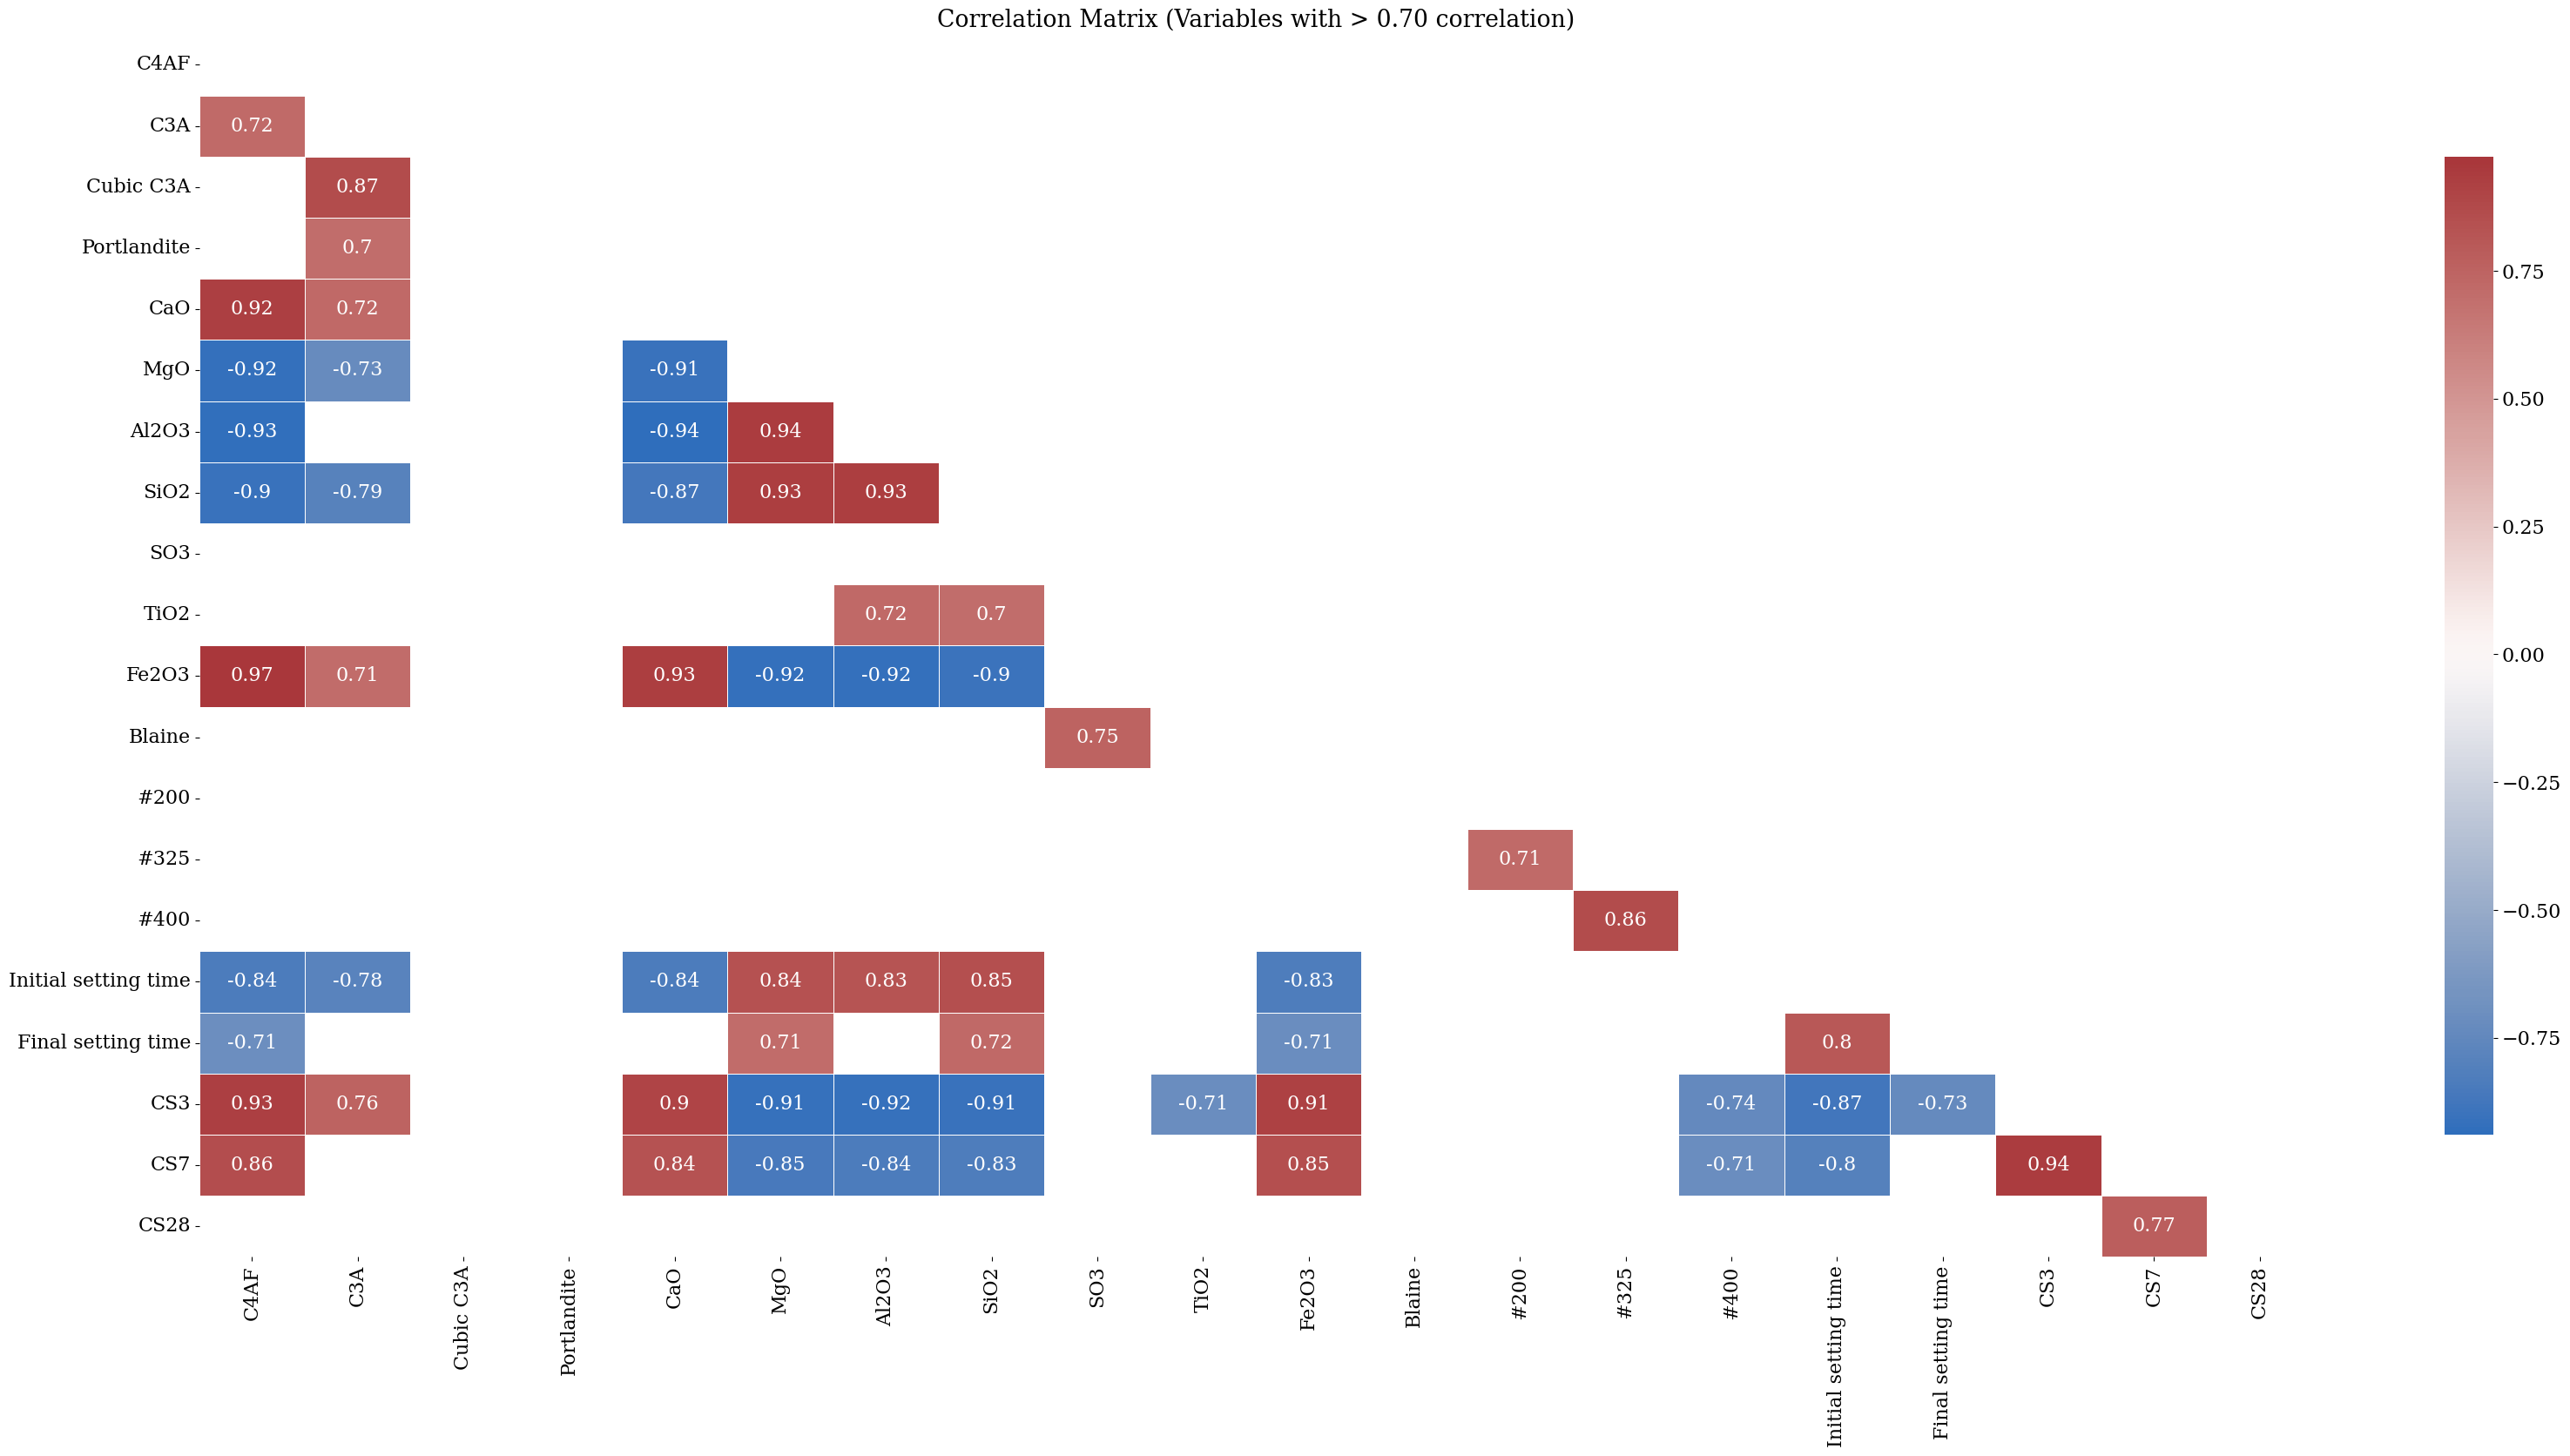

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C4AF                  Fe2O3                   0.973632
CS3                   CS7                     0.942525
MgO                   Al2O3                   0.939778
CaO                   Al2O3                   0.939361
MgO                   SiO2                    0.934434
CaO                   Fe2O3                   0.934345
Al2O3                 SiO2                    0.933868
C4AF                  Al2O3                   0.931135
                      CS3                     0.927728
MgO                   Fe2O3                   0.923723
C4AF                  MgO                     0.923521
                      CaO                     0.922349
Al2O3                 Fe2O3                   0.917527
                      CS3                     0.915576
Fe2O3                 CS3                     0.914608
MgO                   CS3                     0.913301
CaO                   MgO                     0.909368
SiO2                  CS3                     0.907655
C4AF      

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.774674
CS3                   CS28    0.671871
Fe2O3                 CS28    0.640946
MgO                   CS28    0.636135
C4AF                  CS28    0.630802
SiO2                  CS28    0.607980
CaO                   CS28    0.604781
Al2O3                 CS28    0.595747
Initial setting time  CS28    0.572129
Final setting time    CS28    0.547632
#400                  CS28    0.466416
#325                  CS28    0.428629
C3A                   CS28    0.428146
TiO2                  CS28    0.399074
Free CaO              CS28    0.345819
Periclase             CS28    0.341898
Blaine                CS28    0.296659
Aphthitalite          CS28    0.285550
Bassanite             CS28    0.270168
Muscovite             CS28    0.268302
Portlandite           CS28    0.231713
#200                  CS28    0.220938
Calcite               CS28    0.208141
Na2O                  CS28    0.179445
Orthorhombic C3A      CS28    0.153489
SO3                   CS2

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

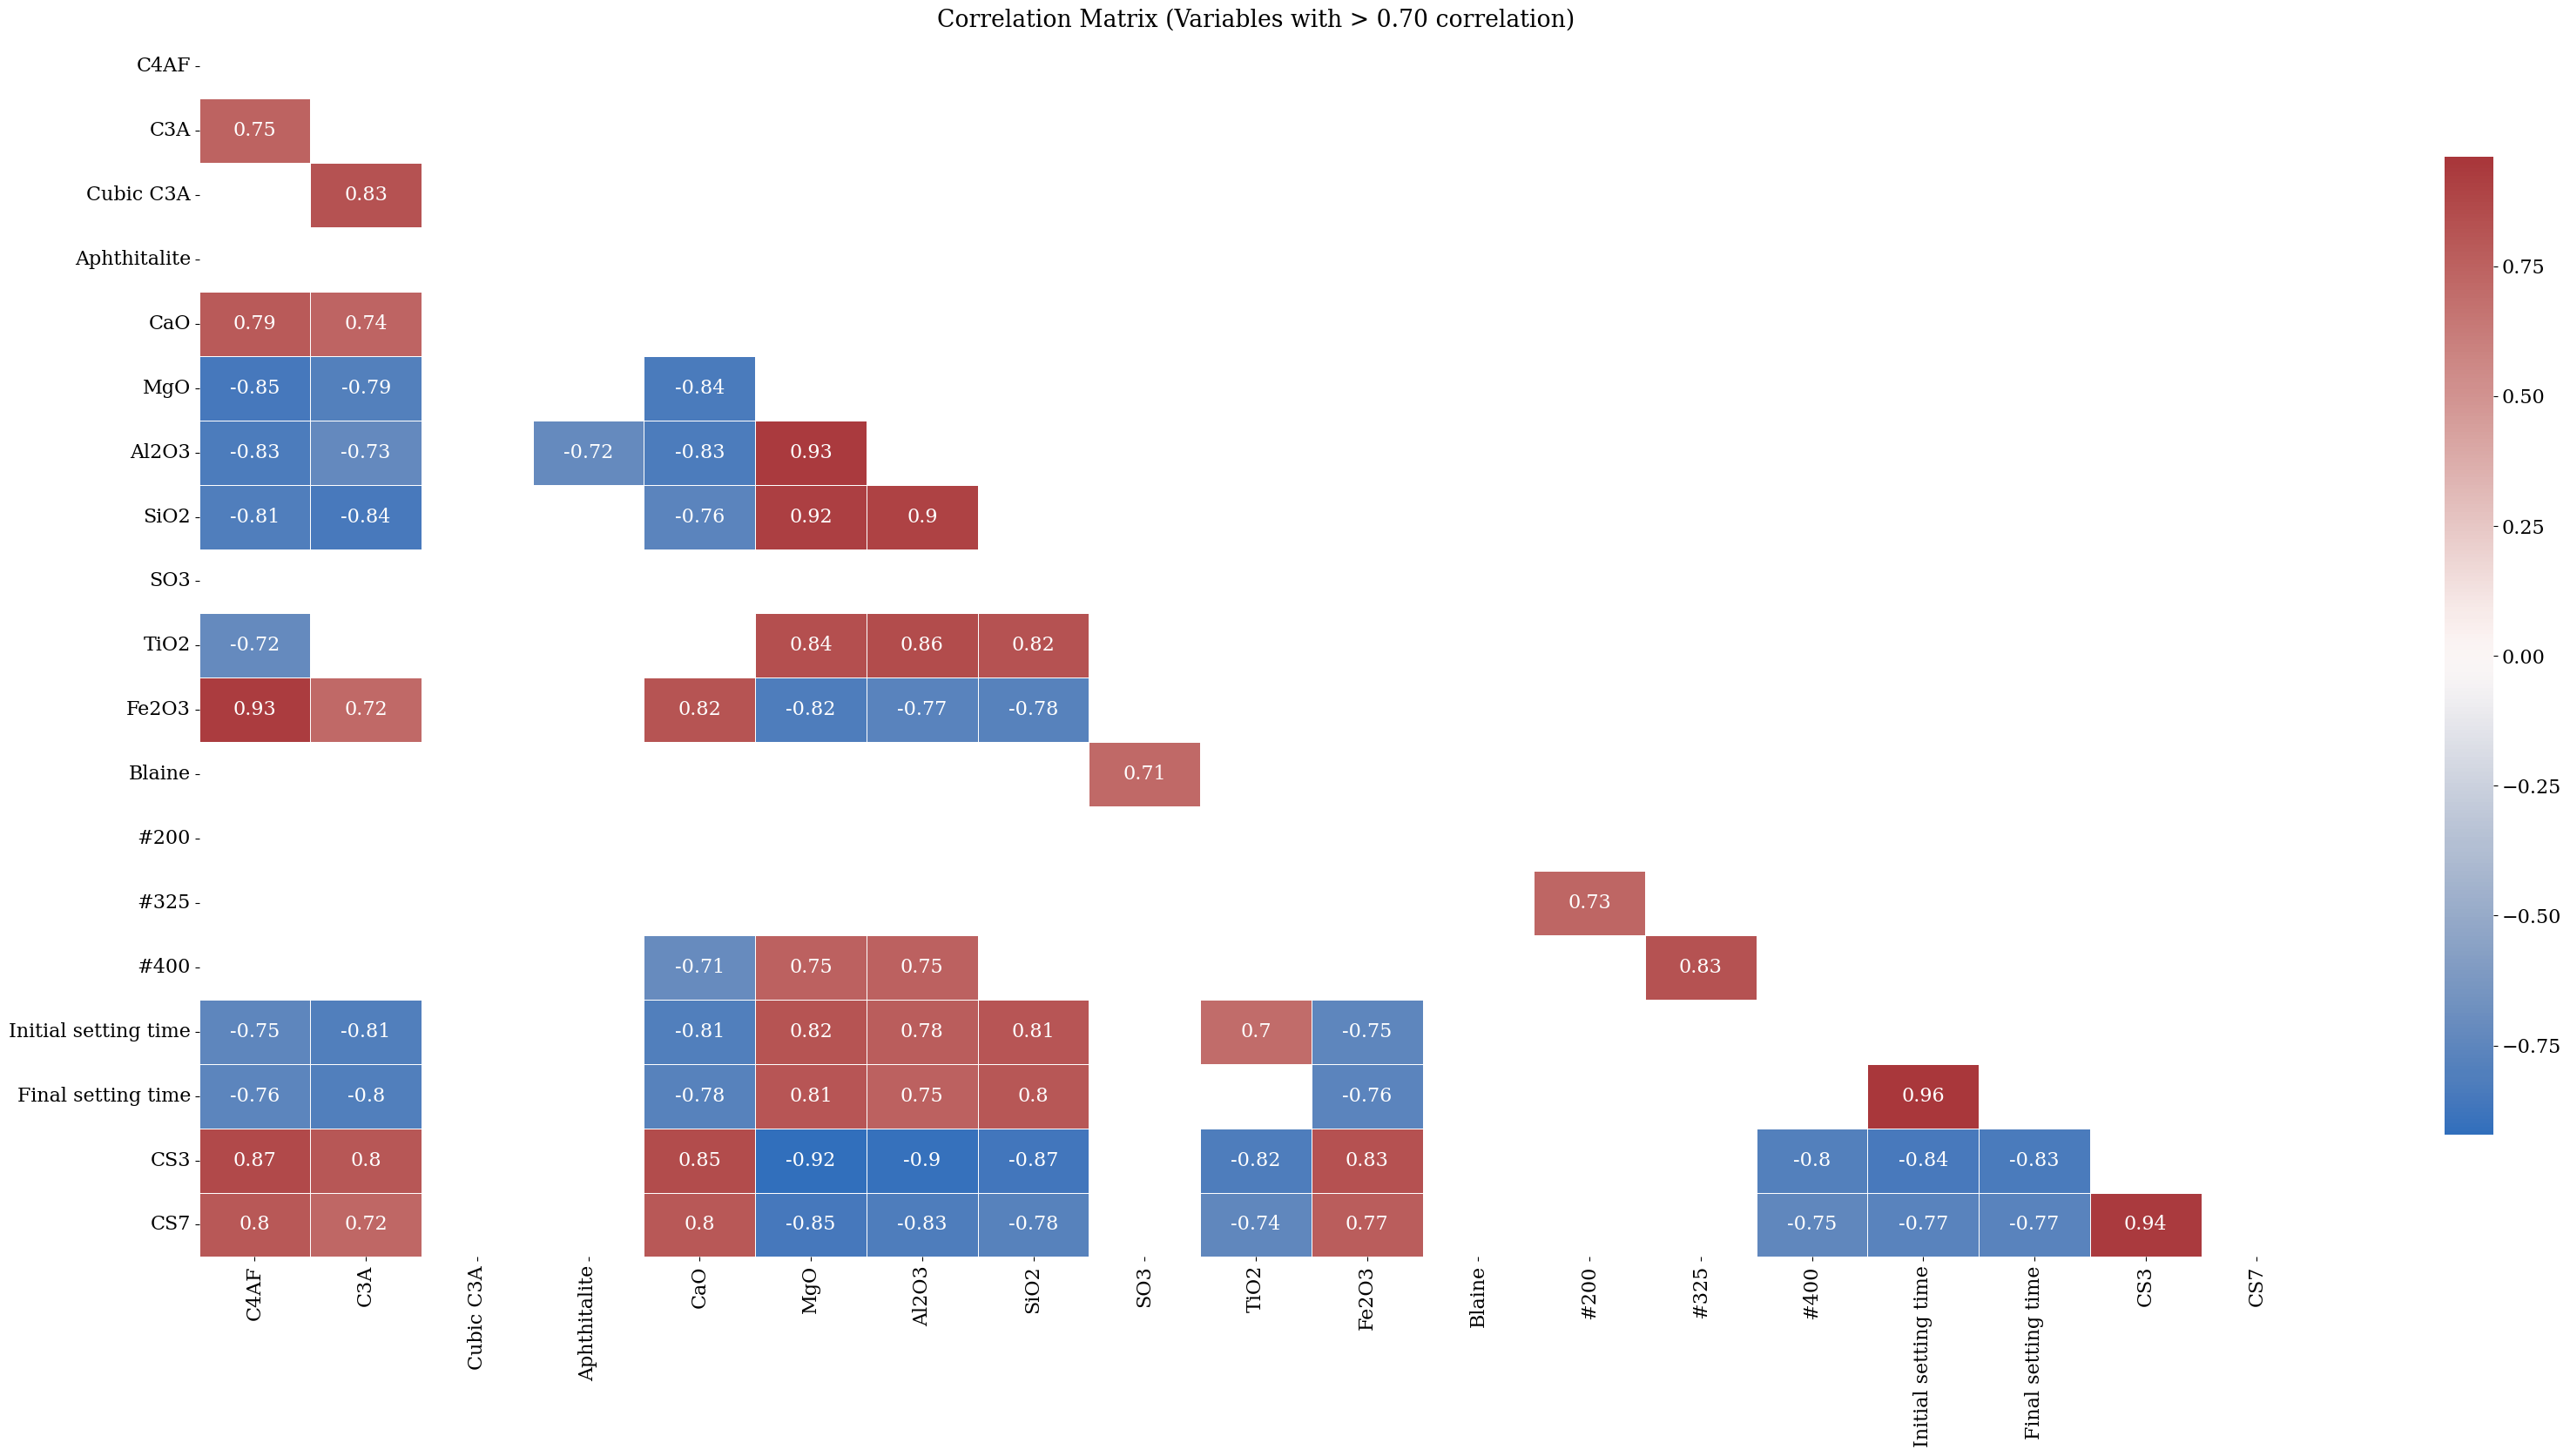

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time      0.961211
CS3                   CS7                     0.935292
MgO                   Al2O3                   0.932730
C4AF                  Fe2O3                   0.930384
MgO                   CS3                     0.921672
                                                ...   
C3A                   CS7                     0.720799
                      Fe2O3                   0.716576
SO3                   Blaine                  0.714549
CaO                   #400                    0.713870
TiO2                  Initial setting time    0.702687
Length: 72, dtype: float64

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.668427
CS3                   CS28    0.561624
MgO                   CS28    0.454881
Final setting time    CS28    0.433565
C4AF                  CS28    0.429237
Fe2O3                 CS28    0.422244
Initial setting time  CS28    0.420273
CaO                   CS28    0.411905
Al2O3                 CS28    0.411774
C3A                   CS28    0.373031
SiO2                  CS28    0.368108
#400                  CS28    0.362589
TiO2                  CS28    0.331530
Free CaO              CS28    0.320208
#325                  CS28    0.307171
Aphthitalite          CS28    0.282488
Blaine                CS28    0.261922
Periclase             CS28    0.261466
Arcanite              CS28    0.236509
Bassanite             CS28    0.235945
Portlandite           CS28    0.203227
Muscovite             CS28    0.179619
Calcite               CS28    0.174733
Orthorhombic C3A      CS28    0.173706
#200                  CS28    0.157593
Na2O                  CS2

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

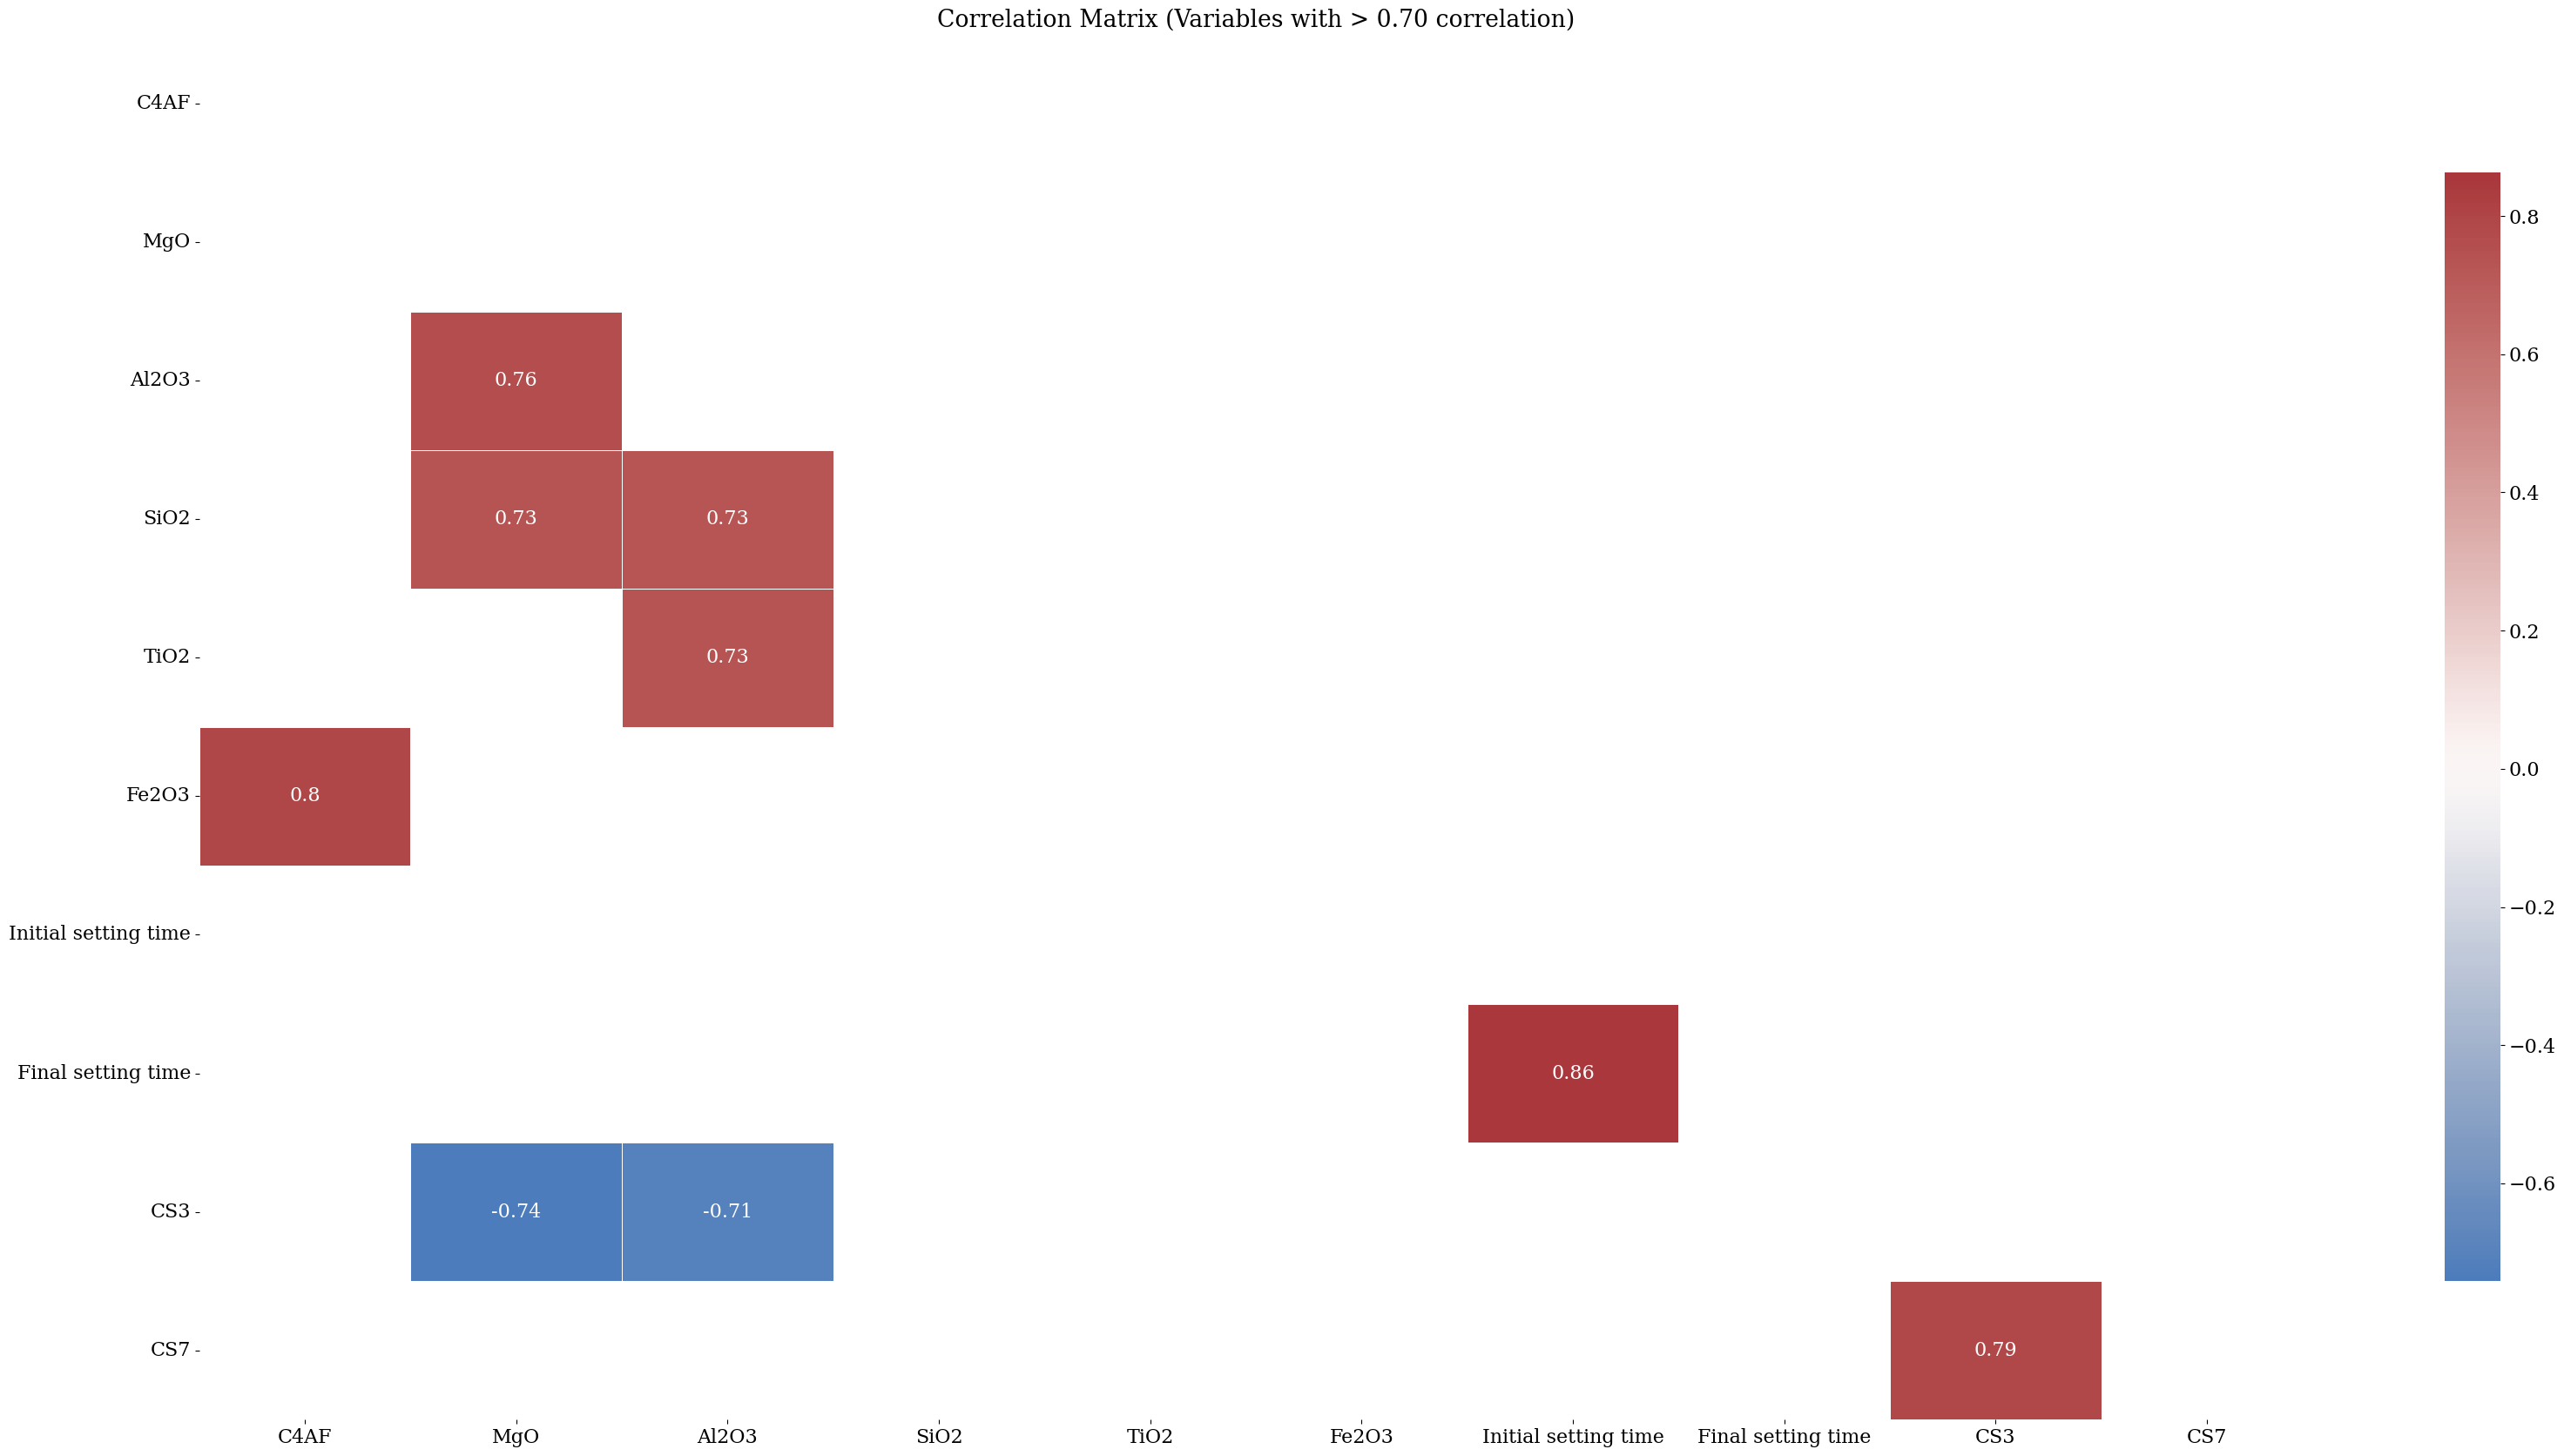

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.862621
C4AF                  Fe2O3                 0.796885
CS3                   CS7                   0.791008
MgO                   Al2O3                 0.764395
                      CS3                   0.741525
Al2O3                 TiO2                  0.734795
MgO                   SiO2                  0.732928
Al2O3                 SiO2                  0.726304
                      CS3                   0.705046
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.500411
CS3                   CS28    0.413787
MgO                   CS28    0.315755
Final setting time    CS28    0.304154
C4AF                  CS28    0.300906
Fe2O3                 CS28    0.294540
Initial setting time  CS28    0.291791
CaO                   CS28    0.279477
Al2O3                 CS28    0.274397
C3A                   CS28    0.254996
#400                  CS28    0.254247
SiO2                  CS28    0.247937
TiO2                  CS28    0.229256
#325                  CS28    0.216507
Free CaO              CS28    0.213994
Aphthitalite          CS28    0.195070
Arcanite              CS28    0.180299
Blaine                CS28    0.174874
Periclase             CS28    0.169279
Bassanite             CS28    0.157113
Portlandite           CS28    0.134736
Muscovite             CS28    0.122335
Calcite               CS28    0.120666
Orthorhombic C3A      CS28    0.120246
#200                  CS28    0.119773
Na2O                  CS2

<IPython.core.display.Javascript object>

#### Bivariate Analysis

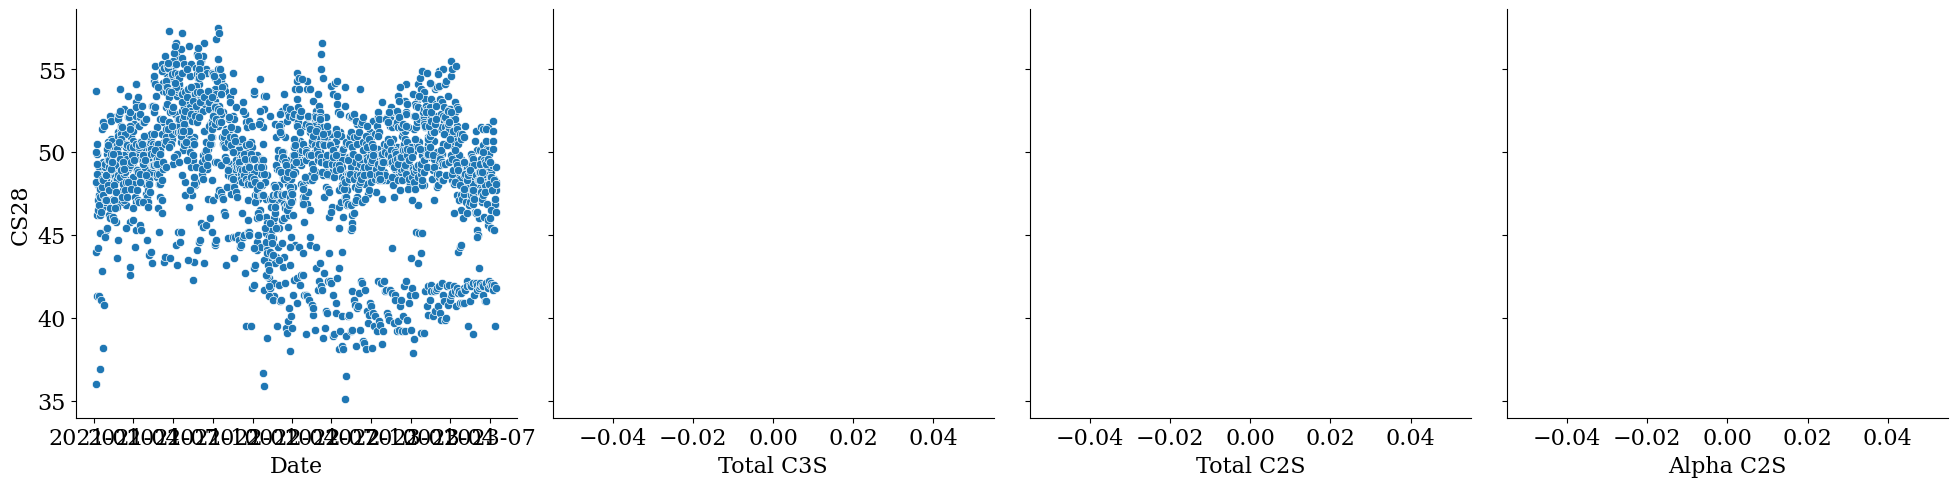

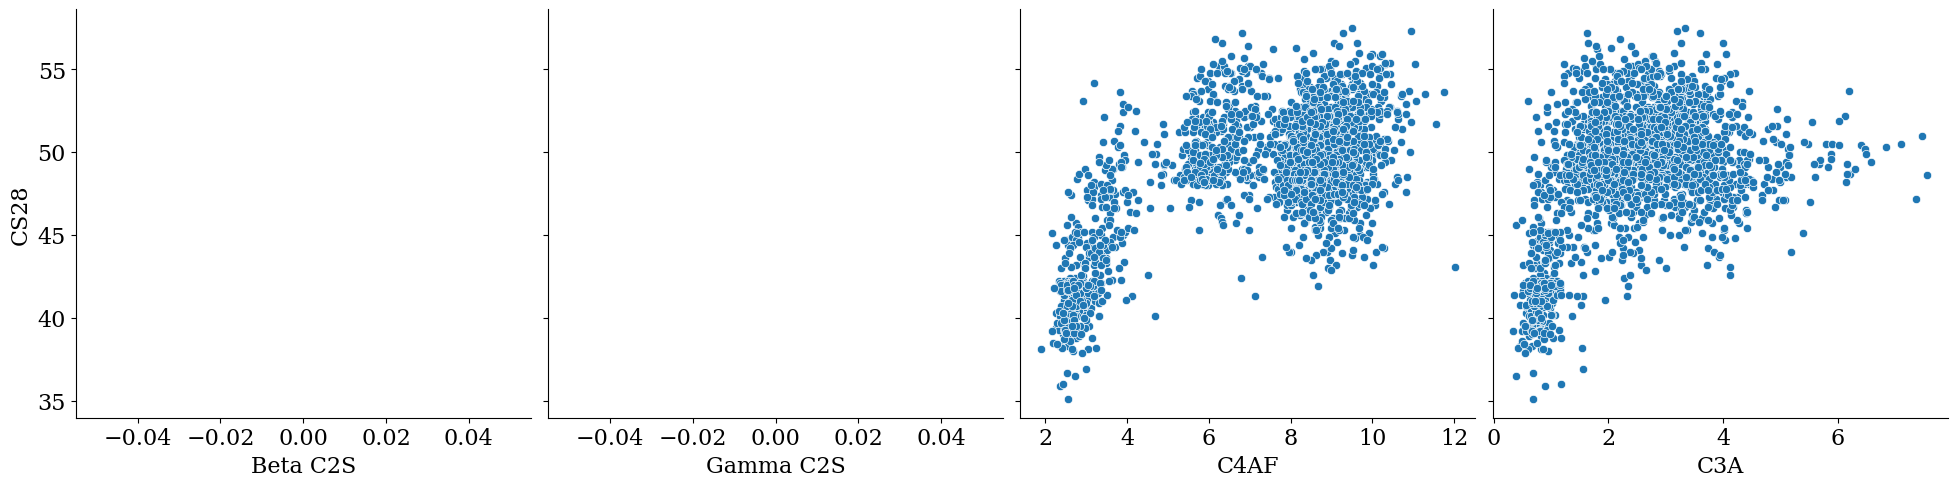

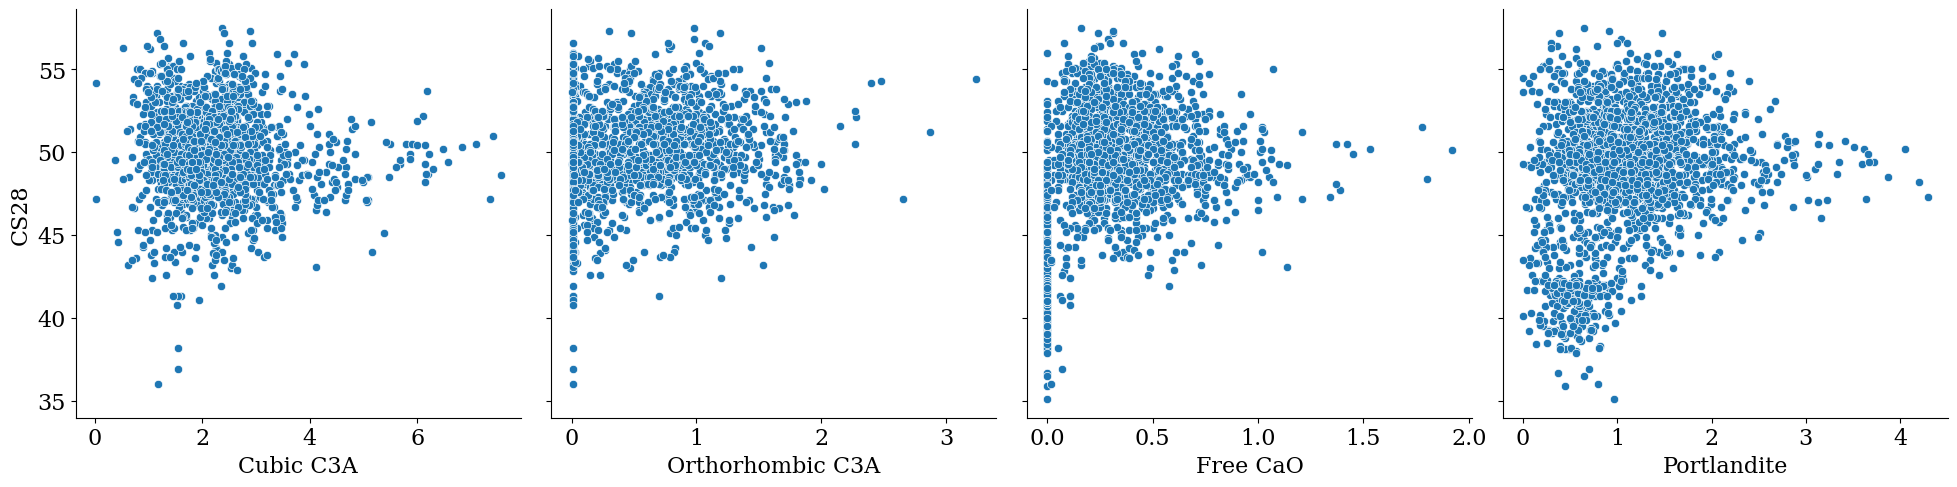

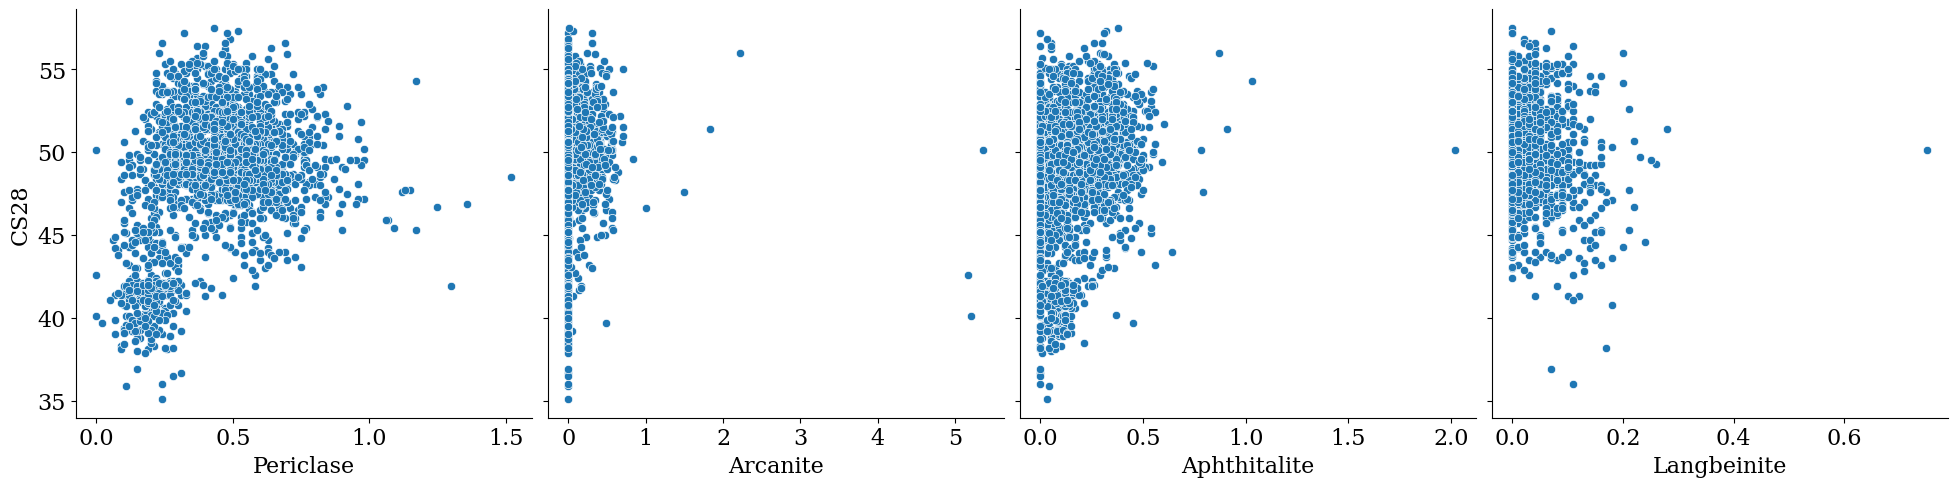

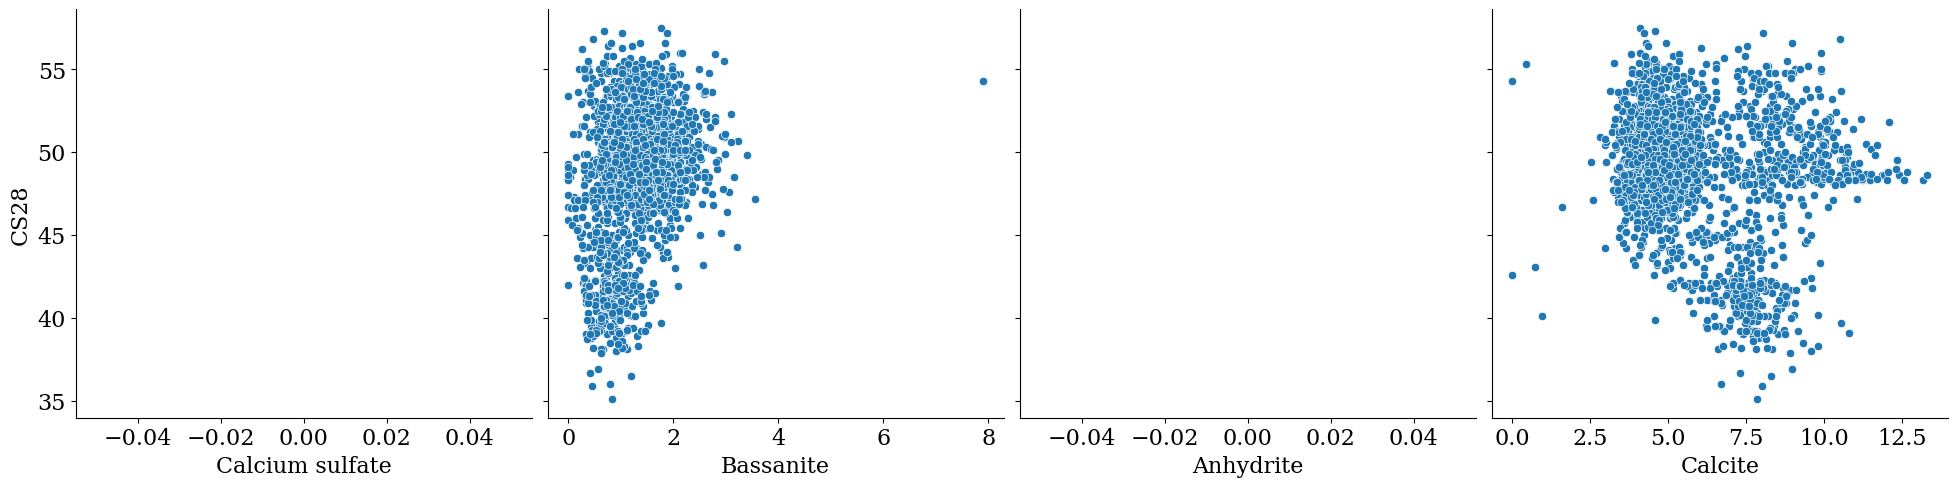

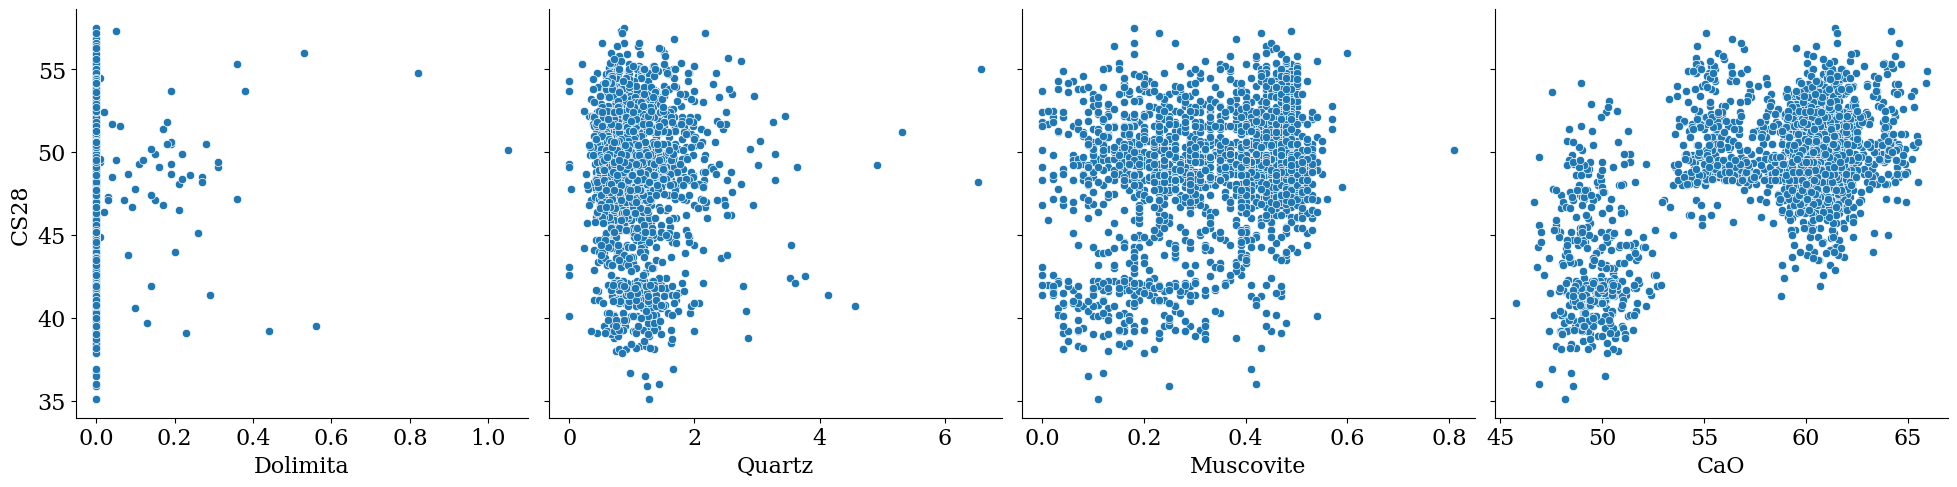

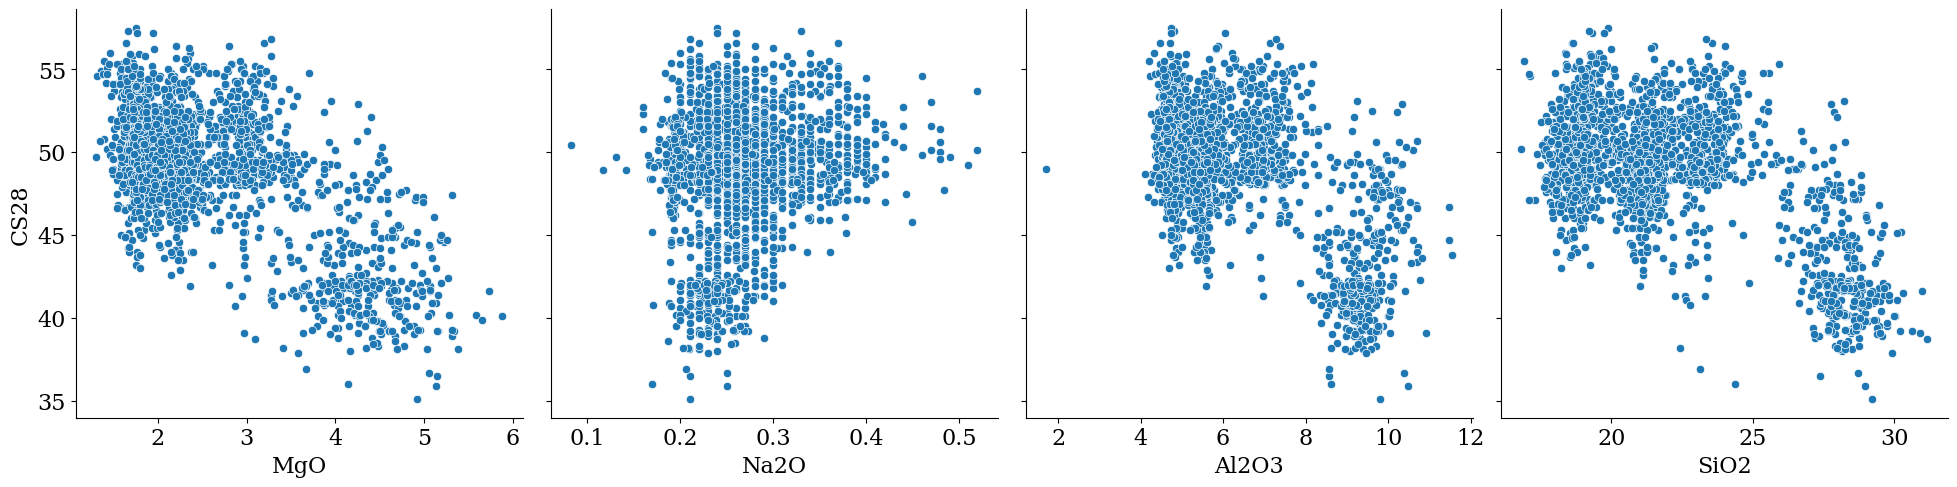

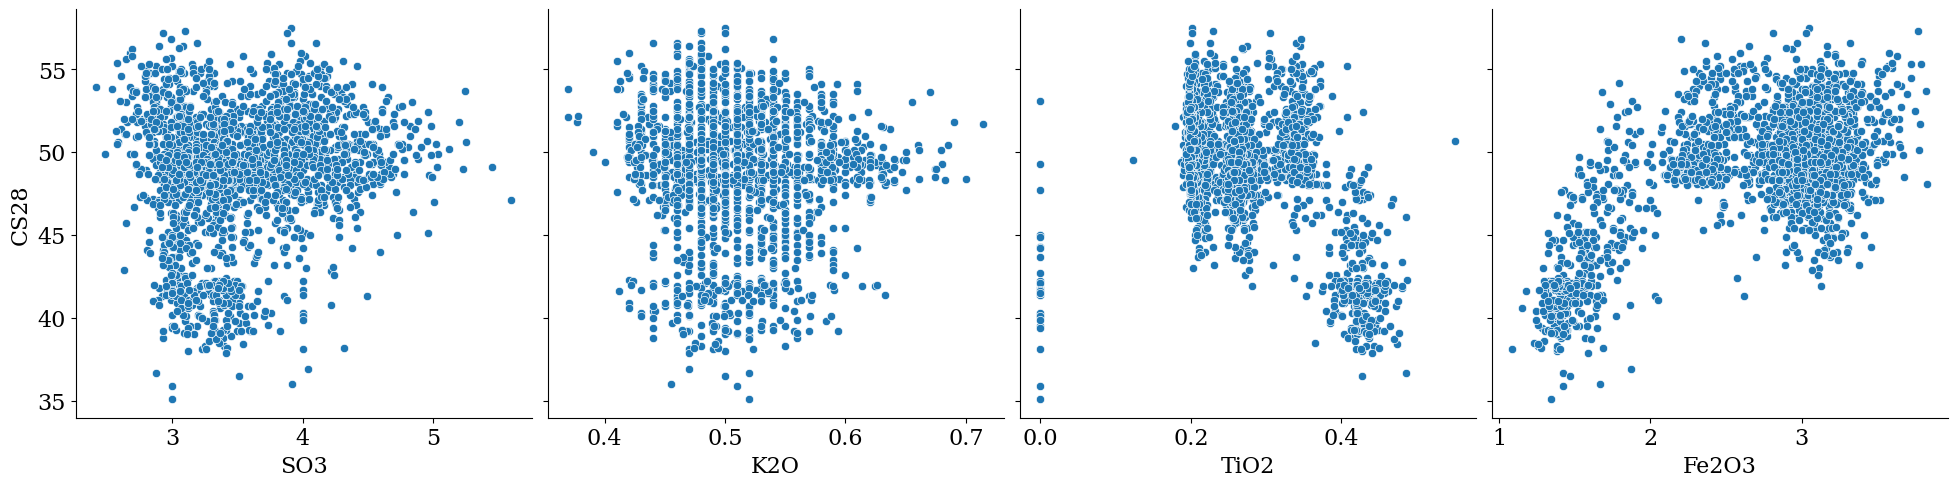

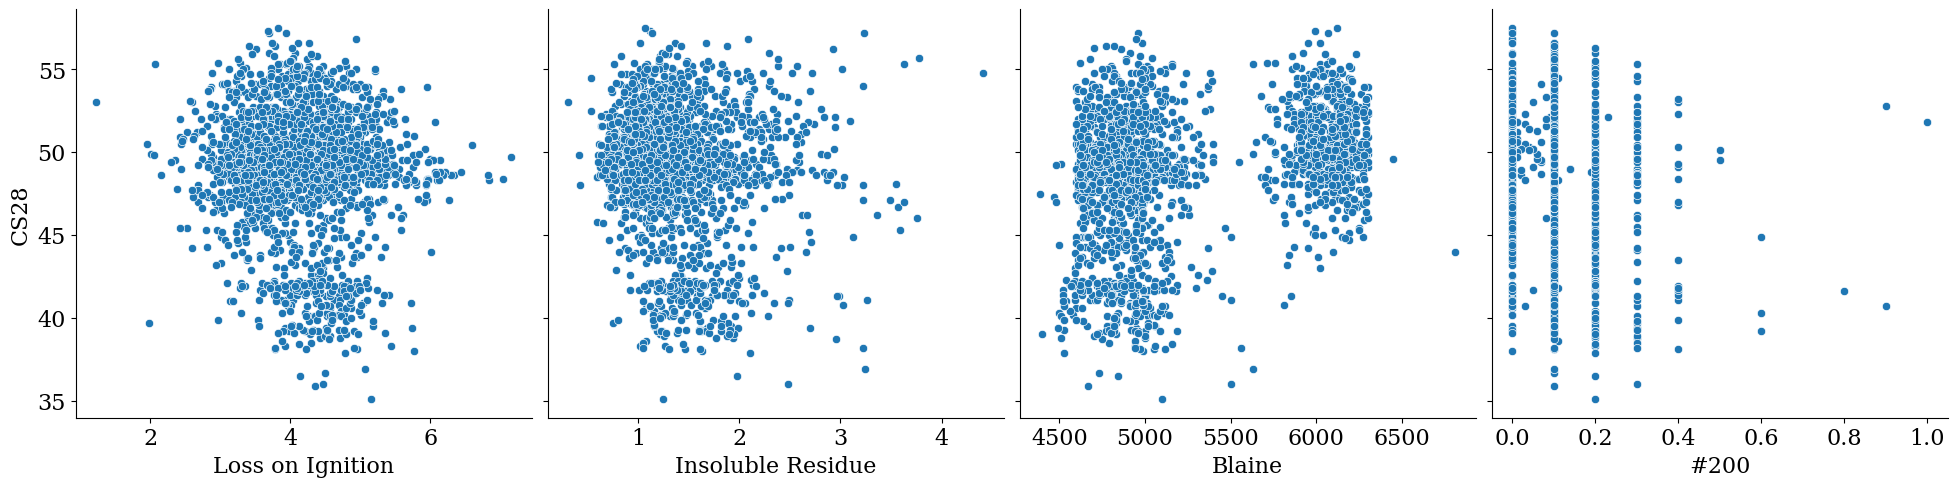

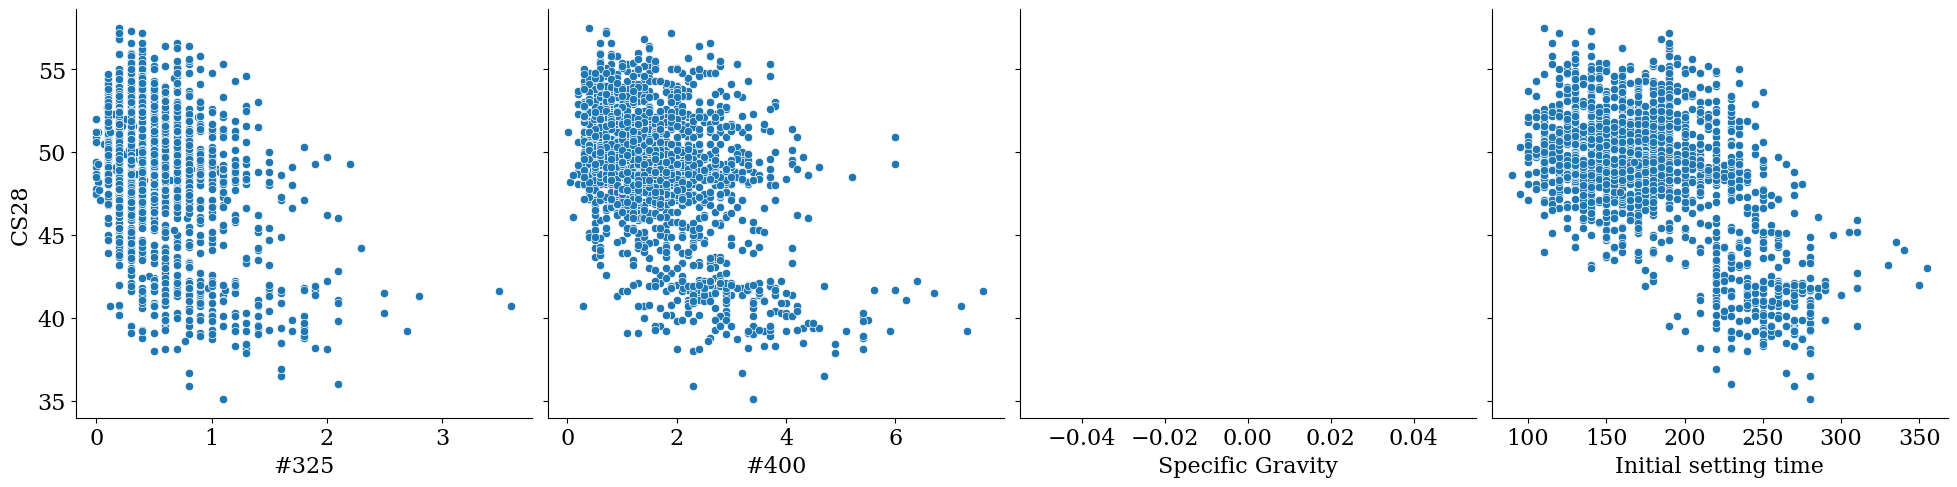

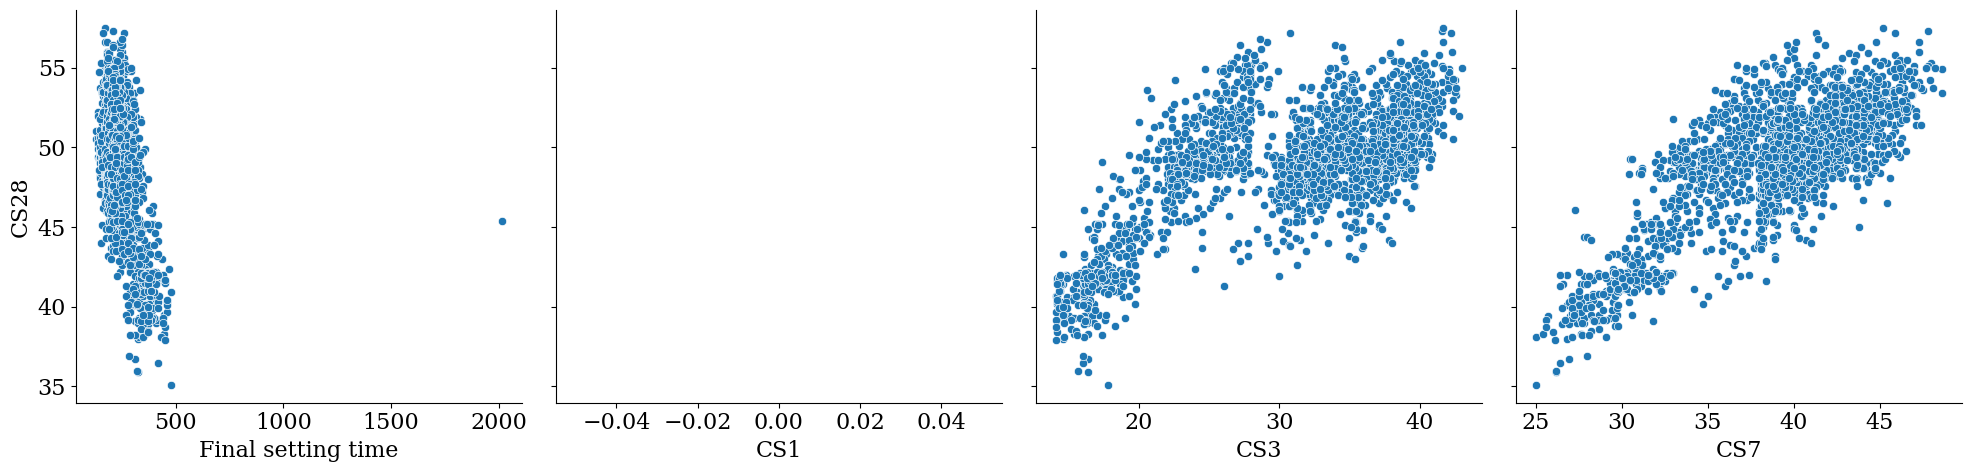

<IPython.core.display.Javascript object>

In [71]:
num_lines = 11
plots_per_line = 4

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

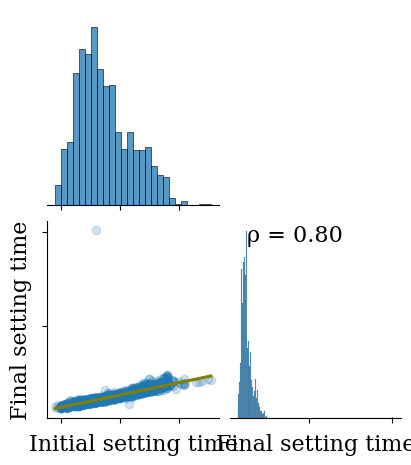

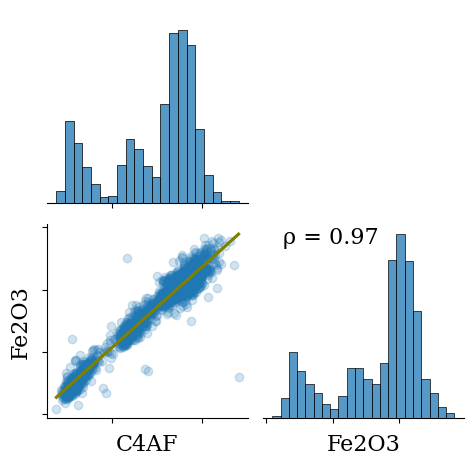

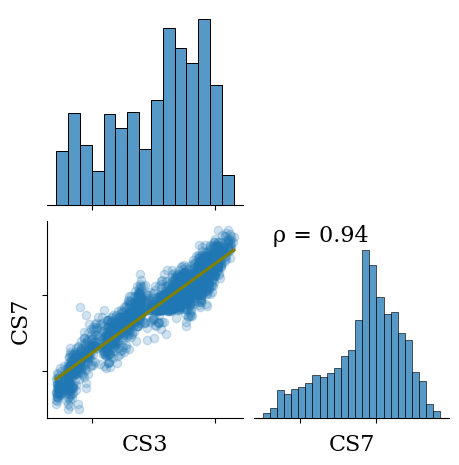

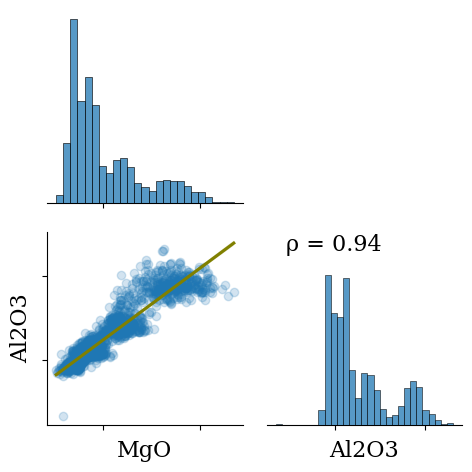

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

614 valid days out of 742


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        21
      2        23
      3        26
      4        24
      5        26
      6        24
      7        27
      8        25
      9        25
      10       23
      11       23
      12       26
2022  1        25
      2        24
      3        22
      4        22
      5        25
      6        23
      7        26
      8        27
      9        23
      10       24
      11       24
      12       25
2023  1        26
      2        22
      3        23
      4        23
      5        27
      6        25
      7        13
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

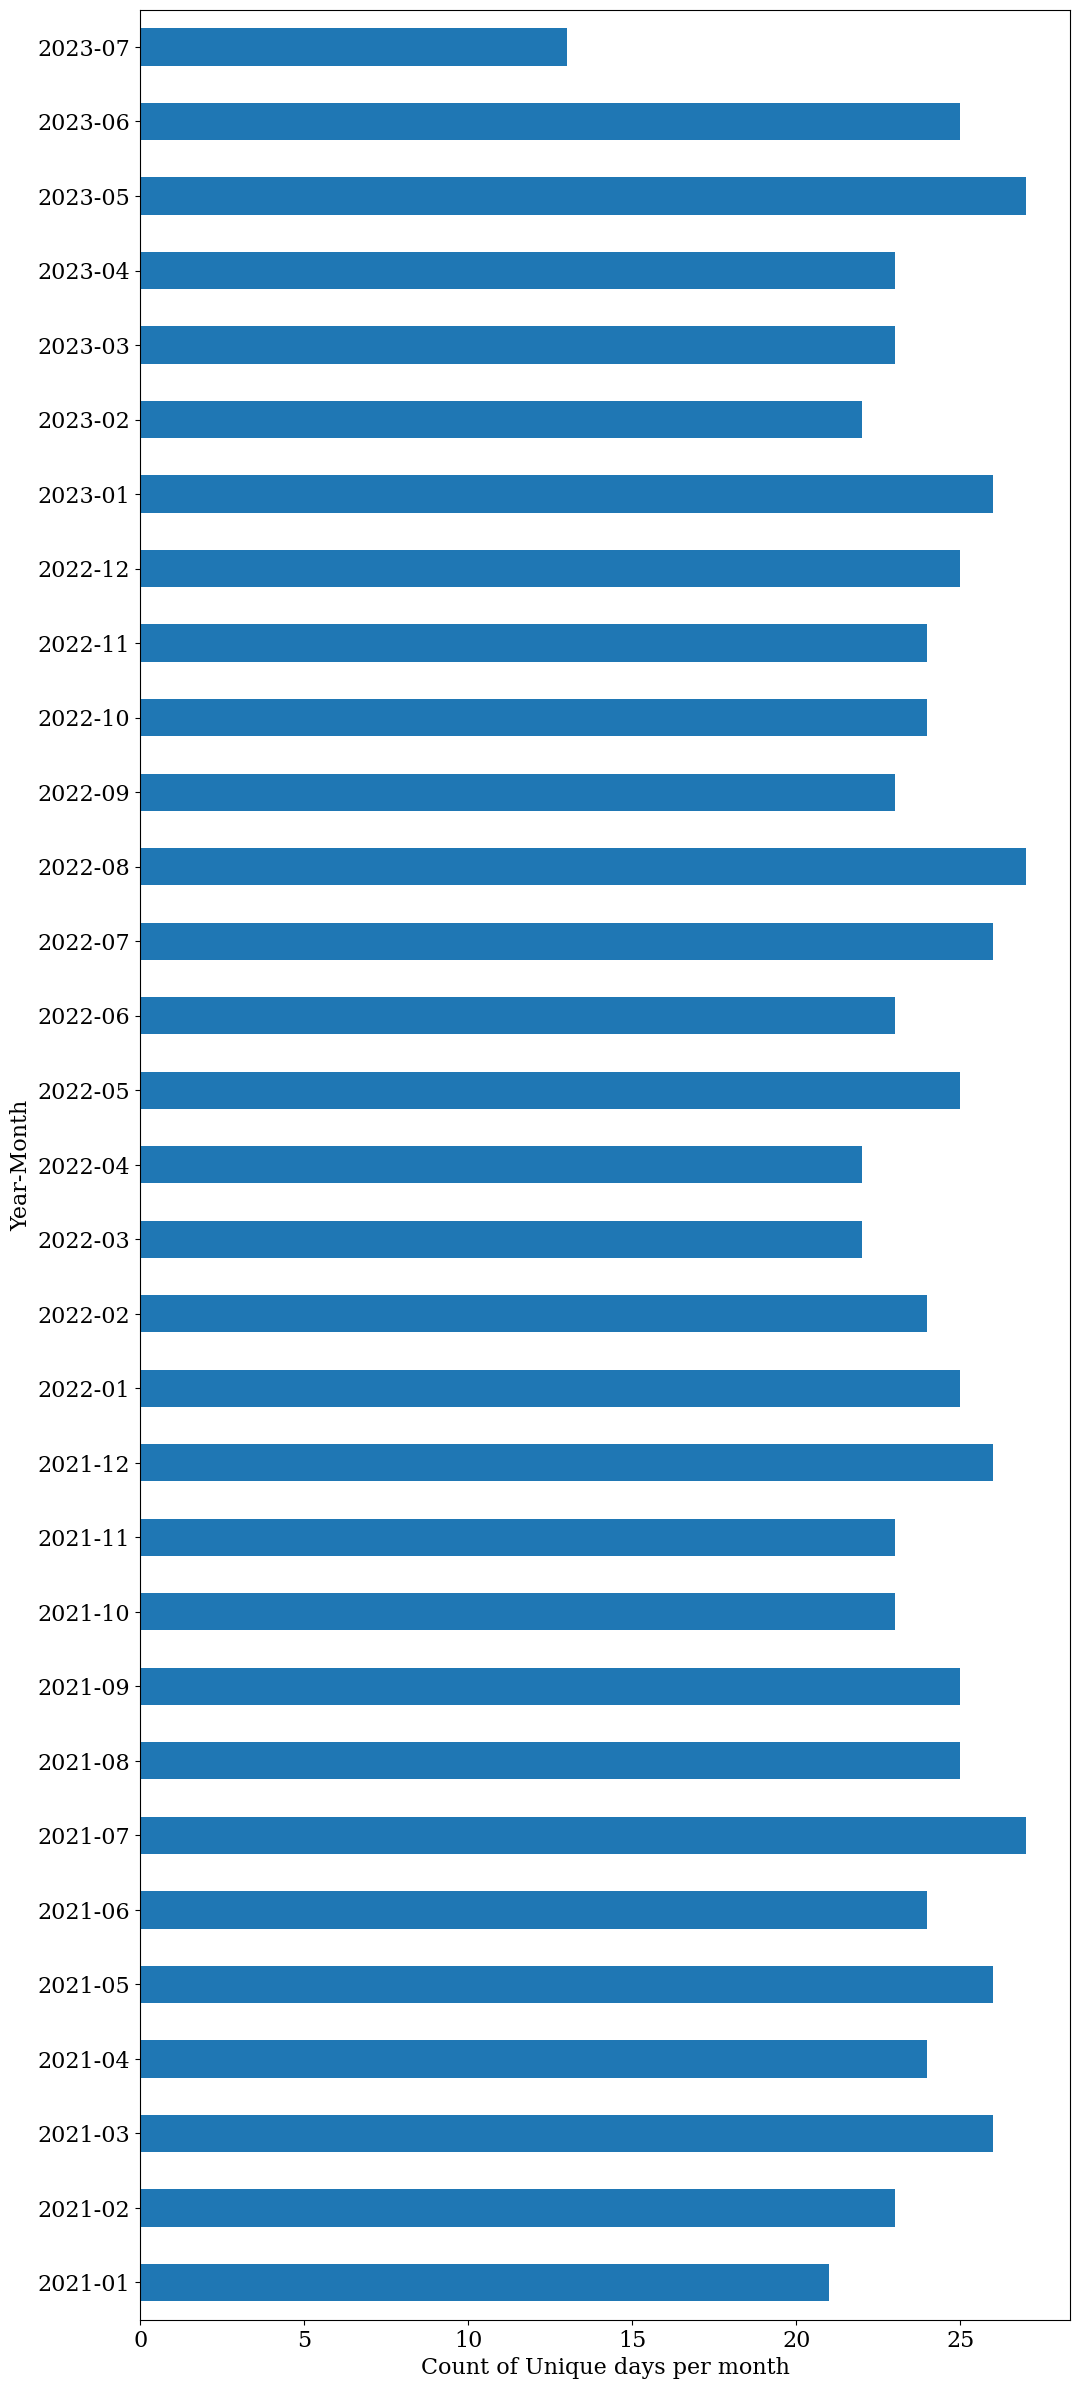

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        62
      2        64
      3        72
      4        65
      5        69
      6        65
      7        71
      8        70
      9        67
      10       64
      11       61
      12       70
2022  1        66
      2        64
      3        70
      4        63
      5        69
      6        66
      7        67
      8        73
      9        65
      10       65
      11       67
      12       68
2023  1        69
      2        62
      3        70
      4        65
      5        72
      6        66
      7        37
Name: size, dtype: int64


<IPython.core.display.Javascript object>

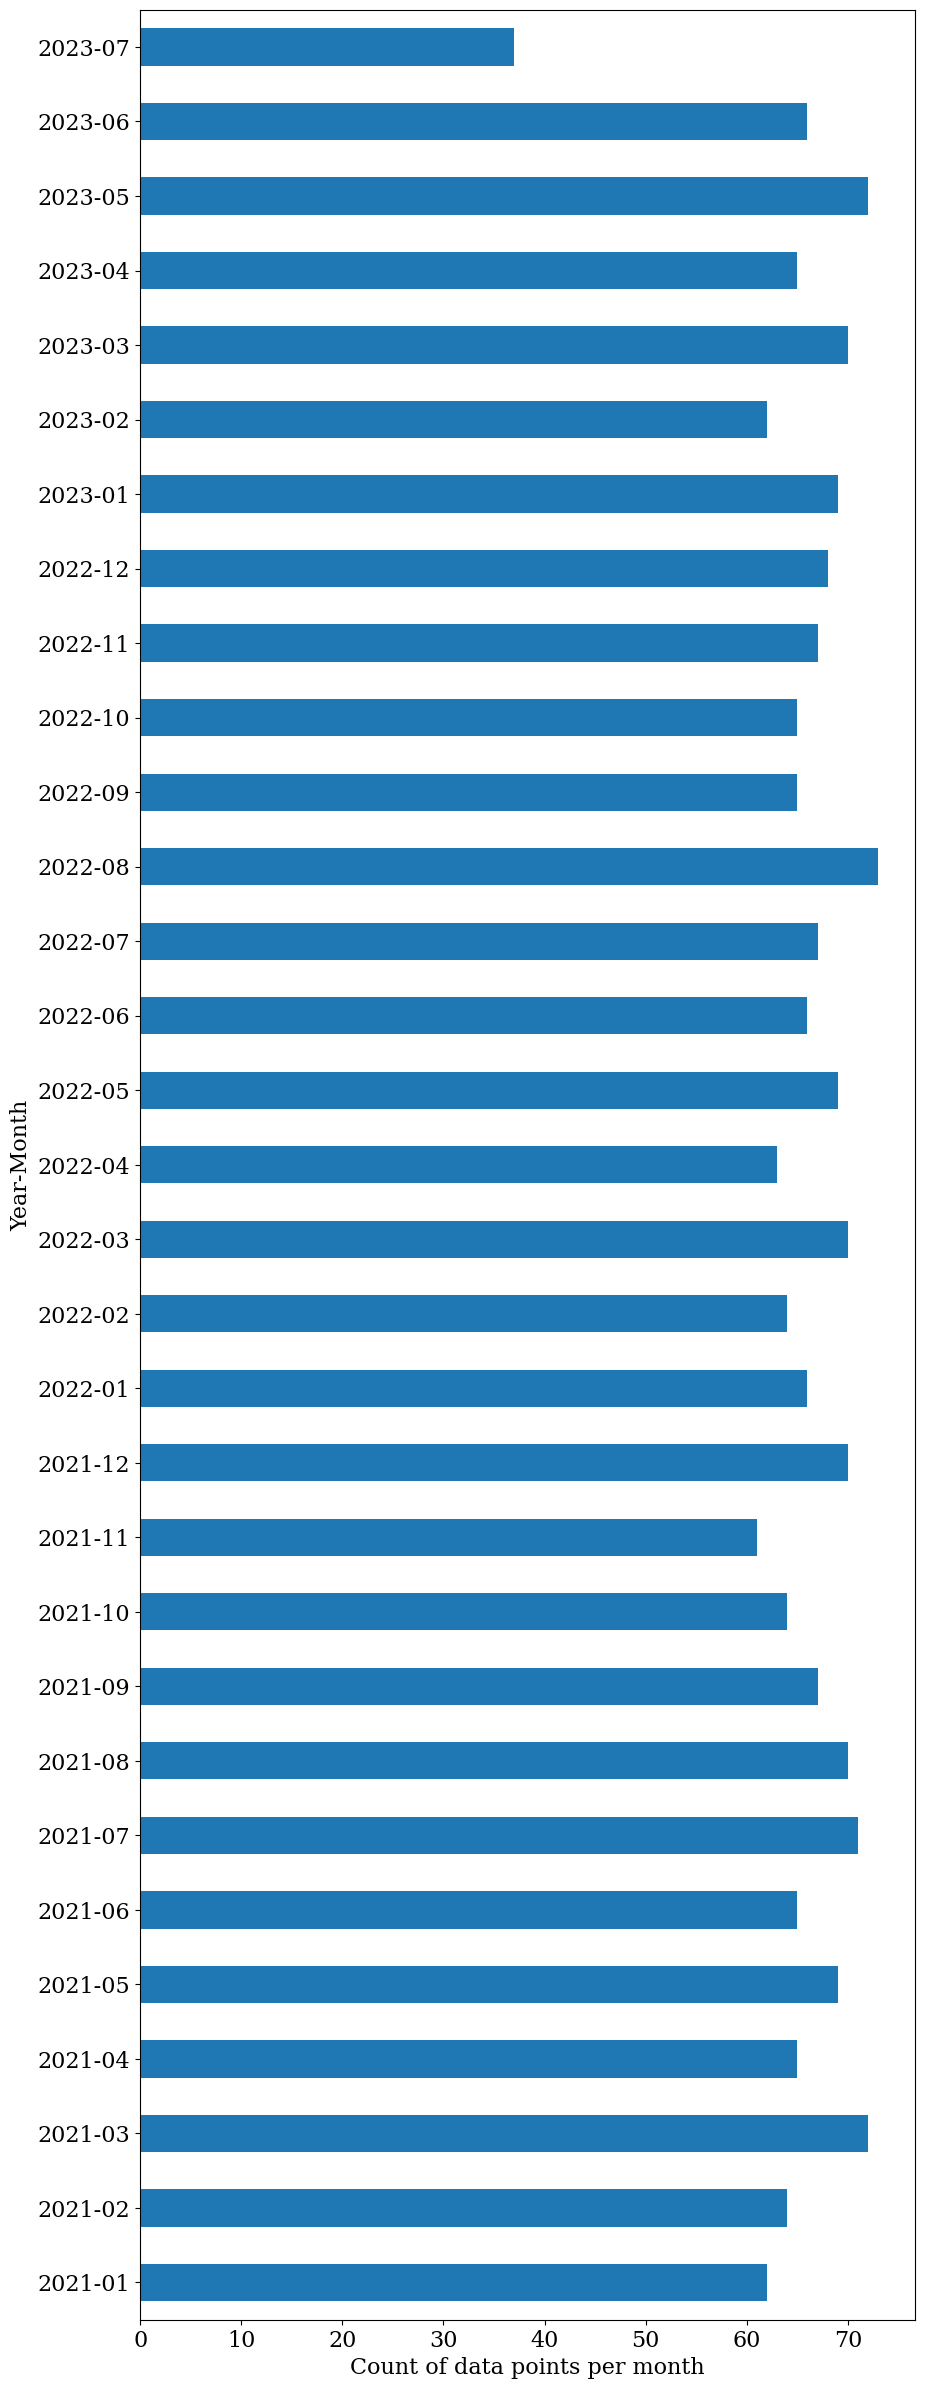

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-7 has the minimum number of days with samples - 37
2022-8 has the maximum number of days with samples - 73


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 66, 2022: 66, 2023: 63}

Mean number of observations - all years
65


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  742.000000
mean     2.754717
std      0.887276
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      4.000000

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
3           297
2           222
4           162
1            61
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
3    2021      1    7         4
4    2021      1    9         4
6    2021      1   12         4
8    2021      1   14         4
9    2021      1   16         4
..    ...    ...  ...       ...
643  2023      3   18         4
645  2023      3   21         4
647  2023      3   23         4
731  2023      7    4         4
733  2023      7    6         4

[162 rows x 4 columns]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

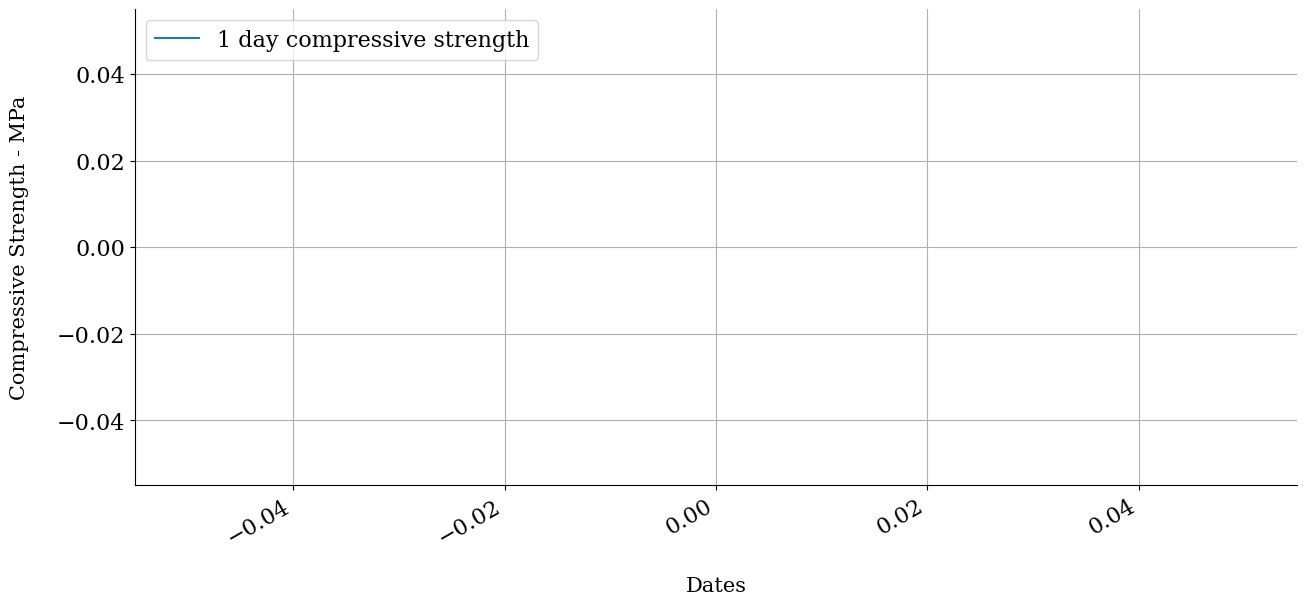

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

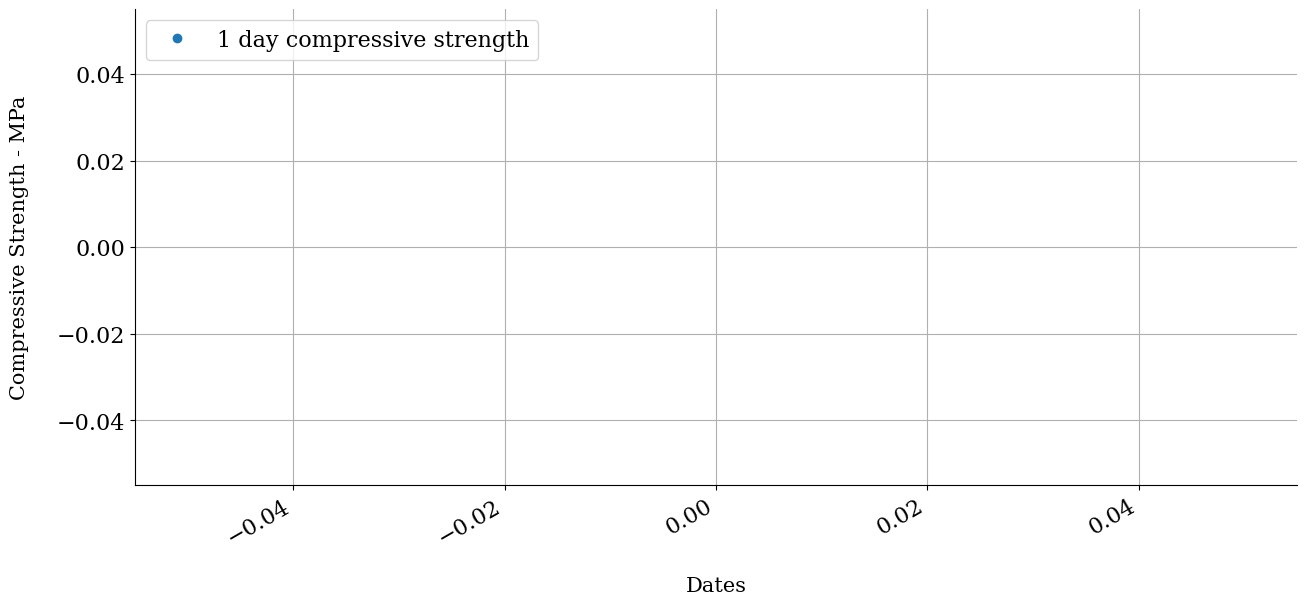

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

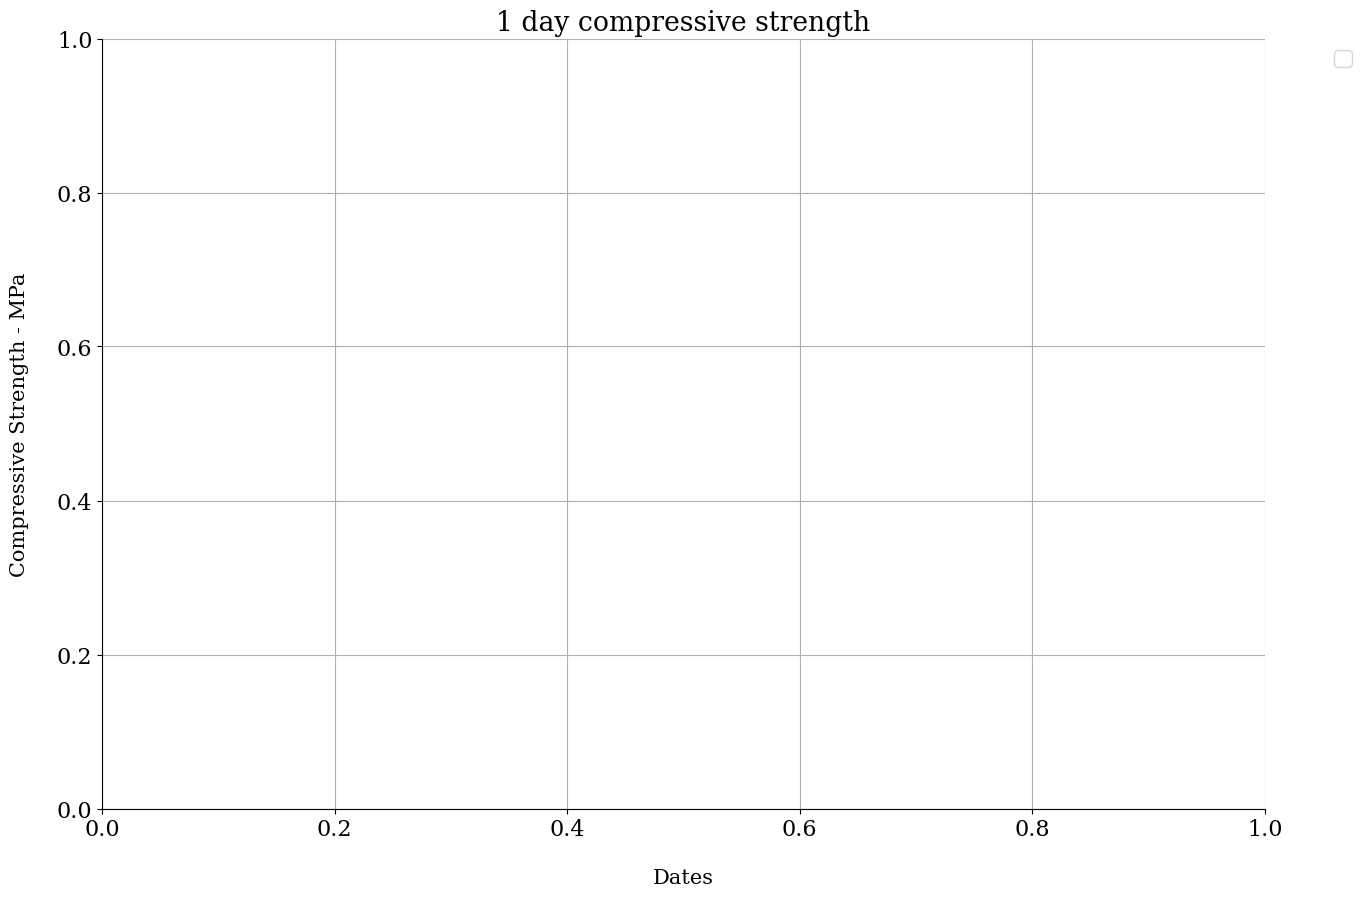

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

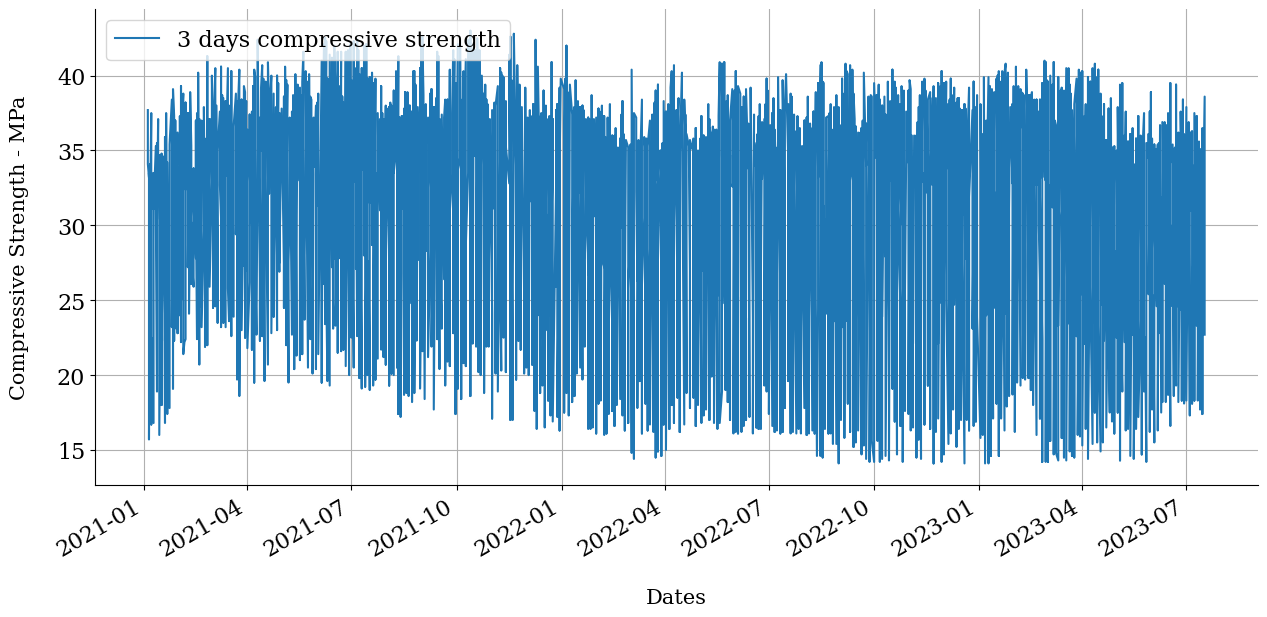

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

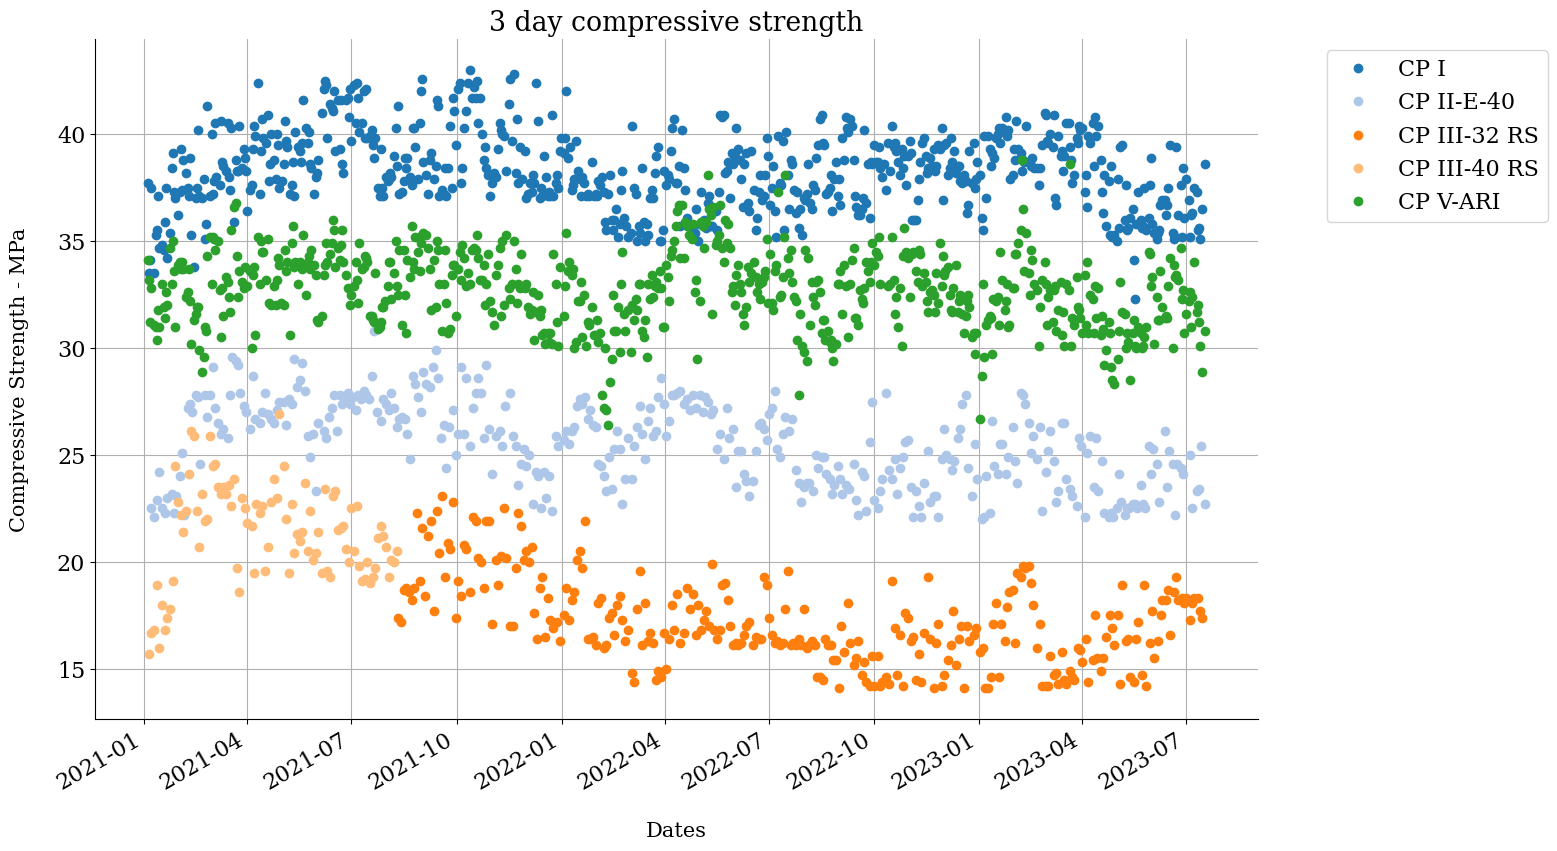

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

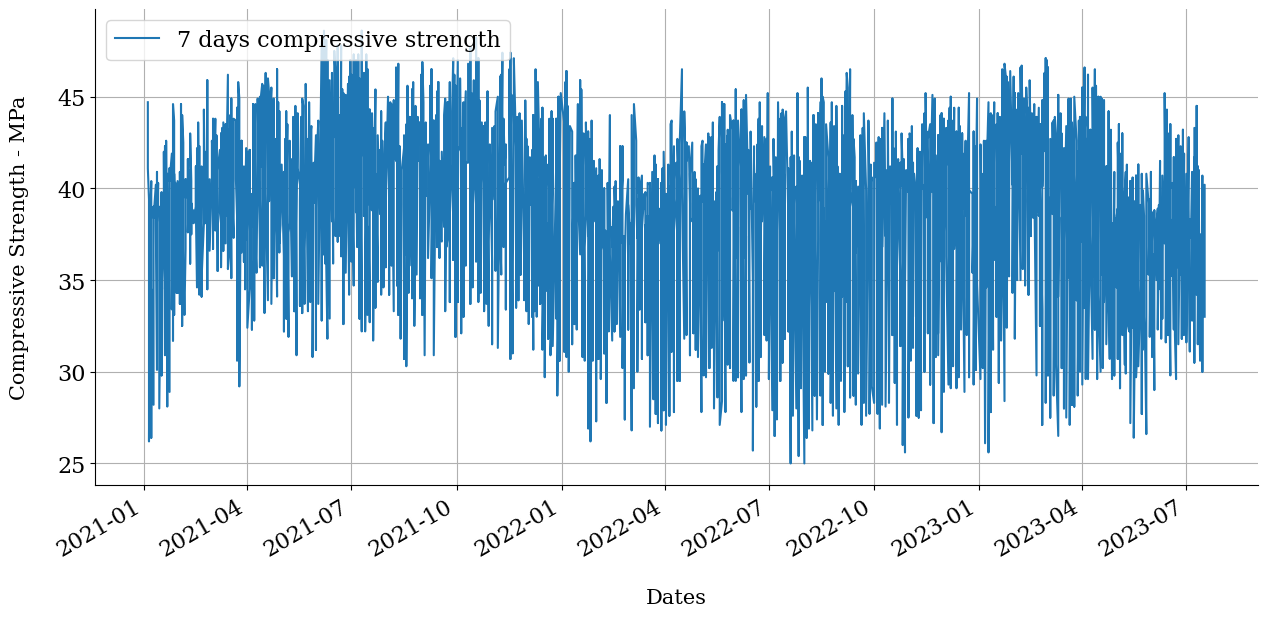

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

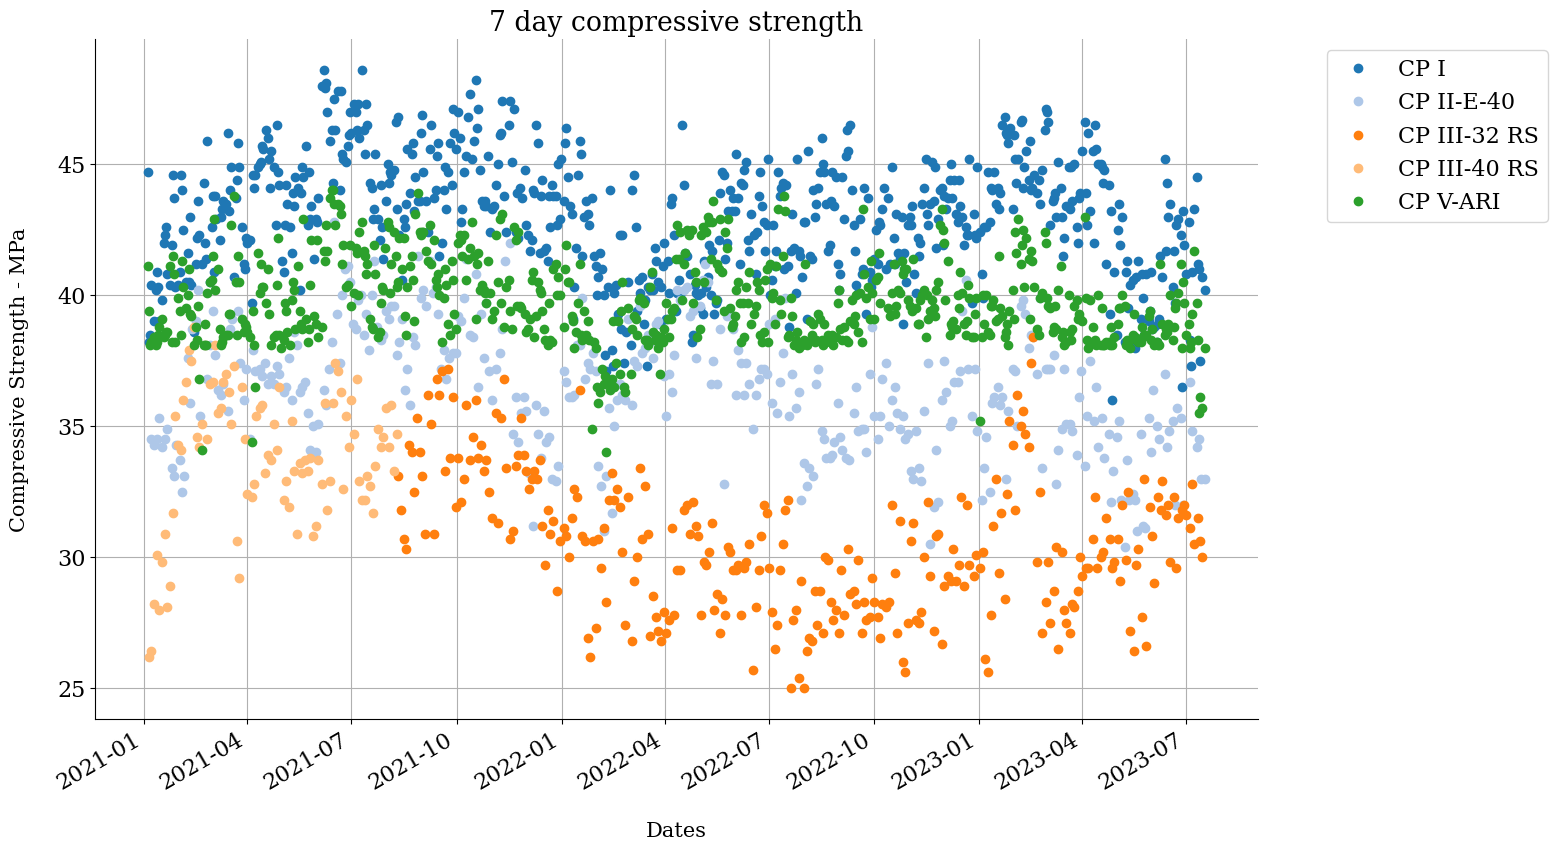

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

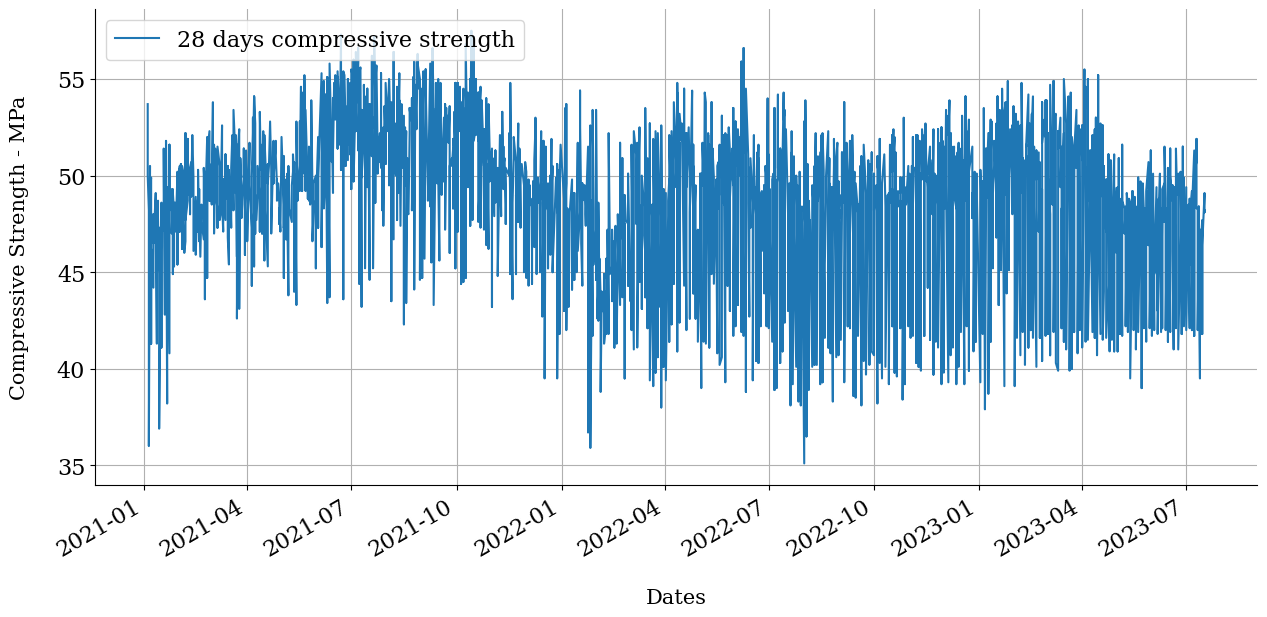

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

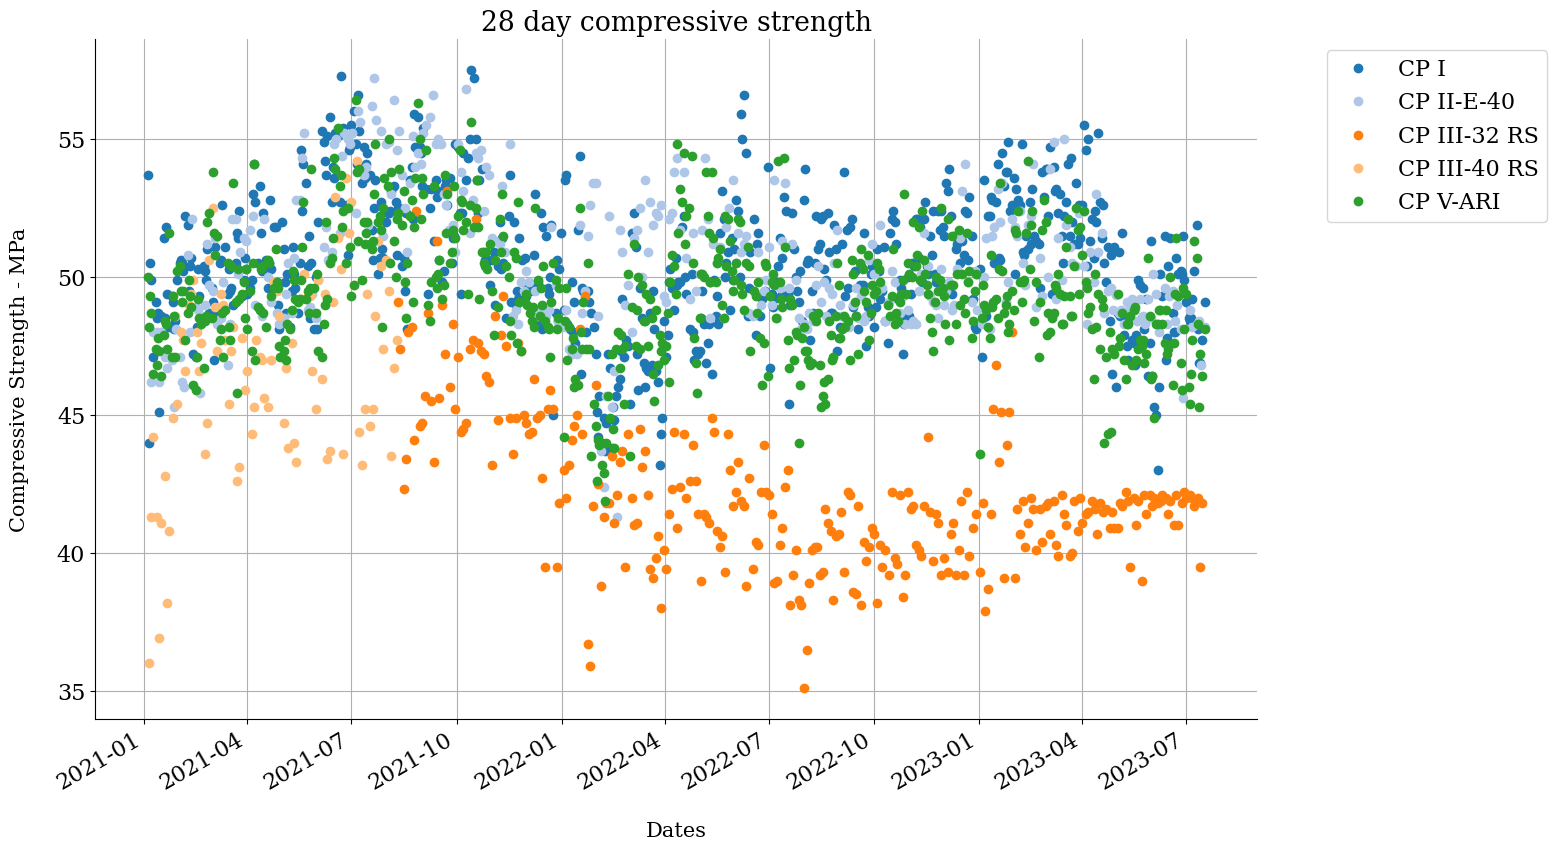

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()